<a href="https://colab.research.google.com/github/mrudulamadhavan/My-Projects/blob/main/InfotactSolutions/AI_Powered_Task_Management_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI-powered Task Management System**

An AI-powered task management system is a digital platform that leverages artificial intelligence (AI), including machine learning (ML) and natural language processing (NLP), to automate and optimize task organization, prioritization, and assignment. Unlike traditional systems that rely heavily on manual inputs and static rules, AI-powered solutions use advanced algorithms to enhance workflow efficiency, reduce human error, and increase productivity. The system intelligently classifies tasks, prioritizes them based on urgency, and assigns them to the most suitable user, considering their workload, behavior, and deadlines.

## **Problem Statement**
Design and develop an AI-powered task management system that employs NLP and ML techniques to automatically classify, prioritize, and assign tasks to users based on their behavior, deadlines, and workloads. This system aims to streamline task handling, increase efficiency, and enhance user experience by making data-driven decisions for task management.

In [1]:
!pip install --upgrade --force-reinstall gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Att

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

# NLP packages
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
from gensim.models import Word2Vec


import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [4]:
# loading dataset
df= pd.read_csv('ai_powered_task_management_dataset.csv')
df.head()

,user_id,task_id,task_description,priority,deadline,estimated_time_hrs,actual_time_hrs,user_avg_daily_hours,user_current_workload_hrs,user_behavior_score,task_assignment_score,dependencies,urgency,delay_days,completion_time_hrs,completion_efficiency
0,U052,T0000,Write report,Medium,2025-06-08 00:00,8.6,11.1,9.1,9.2,0.12,0.91,T0020,0.20,5,16.1,0.53
1,U093,T0001,Review code,High,2025-05-26 00:00,8.6,11.0,5.4,7.0,0.80,0.64,T0020,0.39,3,14.0,0.61
2,U015,T0002,Test module,Low,2025-06-02 00:00,9.6,9.2,6.3,1.6,0.62,0.95,T0030,0.05,0,9.2,1.04
3,U072,T0003,Develop feature,High,2025-05-19 00:00,2.4,4.7,6.8,8.5,0.84,0.88,T0010,0.40,0,4.7,0.51
4,U061,T0004,Review code,Medium,2025-05-31 00:00,6.6,6.5,6.9,6.1,0.10,0.58,NaN,0.51,1,7.5,0.88


### **Data Exploration**

In [5]:
if not df.empty:
    print("\n > About Dataset ")
    df.info()
    print("--"*50)
    print("\n > Dataframe Shape ")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("--"*50)
    print("\n > Column Names ")
    print(df.columns.to_list())
    print("--"*50)
    print("\n > Unique Values of Attributes ")
    print(df.nunique())
else:
    print("DataFrame is empty. Cannot perform initial inspection.")


 > About Dataset 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    500 non-null    object 
 1   task_id                    500 non-null    object 
 2   task_description           500 non-null    object 
 3   priority                   500 non-null    object 
 4   deadline                   500 non-null    object 
 5   estimated_time_hrs         500 non-null    float64
 6   actual_time_hrs            500 non-null    float64
 7   user_avg_daily_hours       500 non-null    float64
 8   user_current_workload_hrs  500 non-null    float64
 9   user_behavior_score        500 non-null    float64
 10  task_assignment_score      500 non-null    float64
 11  dependencies               419 non-null    object 
 12  urgency                    500 non-null    float64
 13  delay_days                 500 

**Observations**
* The dataset contains 500 task records across 16 columns, including 6 categorical and 10 numerical features.

* Only the *dependencies* column has missing values (419 non-null), indicating most tasks are interlinked.

* Key numerical columns track estimated, actual, and completion time, delays, and efficiency.

* Scores such as *user_behavior_score, task_assignment_score*, and *urgency* are normalized between 0 and 1.



In [6]:
# Convert 'deadline' to datetime datatype
df['deadline'] = pd.to_datetime(df['deadline'])

In [7]:
df['priority'] = df['priority'].astype('category')

In [8]:
print(" > Descriptive Statistics (Numerical) \n")
print(df.describe().T)
print("--"*50)
print(" > Descriptive Statistics (Categorical/Object) \n")
print(df.describe(include='object').T)

 > Descriptive Statistics (Numerical) 

                           count                        mean                  min                  25%                  50%                  75%                  max       std
deadline                     500  2025-05-30 02:12:28.800000  2025-05-16 00:00:00  2025-05-22 00:00:00  2025-05-30 00:00:00  2025-06-06 06:00:00  2025-06-14 00:00:00       NaN
estimated_time_hrs         500.0                       5.537                  1.0                  3.2                  5.7                  7.8                 10.0  2.647018
actual_time_hrs            500.0                      6.0026                 -1.0                3.575                  6.2                  8.3                 12.8  3.064996
user_avg_daily_hours       500.0                      6.9584                  4.0                  5.4                 6.85                8.525                 10.0  1.758606
user_current_workload_hrs  500.0                      6.6538                  1.

**Observations**
* Estimated task durations average 5.5 hours, while actual durations average 6.0 hours, showing a consistent underestimation trend.
* A negative value in actual time highlights a data entry error that should be addressed.
* Users typically work around 7 hours daily, and their current workloads are generally well-aligned with this capacity.
* Completion efficiency averages 0.67, indicating that tasks often take about 33% longer than estimated.
* The most common task is “Review code,” showing a focus on repetitive technical tasks.
* Task priorities are skewed toward “Medium,” suggesting limited variation in urgency labeling.
* Deadlines often cluster, particularly on specific milestone dates like May 21, 2025.
* 419 tasks have dependencies, with many linked to T0020, indicating a potential bottleneck or critical task affecting multiple others.


In [9]:
#Check for the null values in dataset
null_count = df.isnull().sum()
null_summary = pd.DataFrame({'null_count': null_count, 'null_percent': 100 * null_count / len(df)}).sort_values(by='null_count', ascending=False)
null_summary

,null_count,null_percent
dependencies,81,16.2
user_id,0,0.0
task_id,0,0.0
task_description,0,0.0
priority,0,0.0
deadline,0,0.0
estimated_time_hrs,0,0.0
actual_time_hrs,0,0.0
user_avg_daily_hours,0,0.0
user_current_workload_hrs,0,0.0


In [10]:
# replacing missing values in dependencies column by None
df['dependencies'] = df['dependencies'].fillna("None")

In [11]:
# Checking for duplicate rows
int(df.duplicated().sum())

0

In [12]:
if not df.empty:
    print("Checking for negative 'actual_time_hrs'")
    negative_actual_time = df[df['actual_time_hrs'] < 0]
    print(f" >> Number of tasks with negative actual_time_hrs: {len(negative_actual_time)}")
    if not negative_actual_time.empty:
        print("\nExamples of tasks with negative actual_time_hrs:\n")
        print(negative_actual_time[['task_id', 'estimated_time_hrs', 'actual_time_hrs', 'completion_efficiency']].head())

    df['actual_time_hrs'] = df['actual_time_hrs'].clip(lower=0)
    print("--"*40)
    print(f"\nNumber of tasks with negative actual_time_hrs after clipping: {len(df[df['actual_time_hrs'] < 0])}")

Checking for negative 'actual_time_hrs'
 >> Number of tasks with negative actual_time_hrs: 9

Examples of tasks with negative actual_time_hrs:

    task_id  estimated_time_hrs  actual_time_hrs  completion_efficiency
16    T0016                 1.0             -0.9                   1.00
73    T0073                 1.0             -0.4                   1.00
146   T0146                 1.3             -0.3                   0.76
154   T0154                 1.4             -0.6                   0.58
230   T0230                 1.0             -1.0                   1.00
--------------------------------------------------------------------------------

Number of tasks with negative actual_time_hrs after clipping: 0


Negative values in *actual_time_hrs* are invalid because time spent on a task can't be negative. These values often result from data entry errors, calculation mistakes, or system bugs.Hence all negative values are clipped to 0, which replaces any negative time with zero. This keeps the data valid and usable without deleting any tasks.

In [13]:
# Check if there are tasks where actual_time_hrs is 0
if 0 in df['actual_time_hrs'].values:
    print("\nTasks where actual_time_hrs is 0 (potential for infinite completion_efficiency):")
    print(df[df['actual_time_hrs'] == 0][['task_id', 'estimated_time_hrs', 'actual_time_hrs', 'completion_efficiency']].head())

    # Handle cases where actual_time_hrs is 0
    # If estimated time > 0 and actual time is 0, completion efficiency is effectively infinite or undefined, set to NaN
    df['completion_efficiency'] = np.where(
        (df['actual_time_hrs'] == 0) & (df['estimated_time_hrs'] > 0),
        np.nan, # Or a large number, e.g., 100, if you want to represent "very efficient"
        df['completion_efficiency']
    )
    # If estimated time is 0 and actual time is 0, assume efficiency is 1.0 (task completed as estimated)
    df['completion_efficiency'] = np.where(
        (df['actual_time_hrs'] == 0) & (df['estimated_time_hrs'] == 0),
        1.0, # Task estimated at 0, took 0. Could be efficiency 1.
        df['completion_efficiency']
    )

    print("\n'completion_efficiency' for tasks with actual_time_hrs == 0 after adjustment:")
    # Corrected indentation for this print statement
    print(df[df['actual_time_hrs'] == 0][['task_id', 'estimated_time_hrs', 'actual_time_hrs', 'completion_efficiency']].head())

else:
    print("DataFrame is empty. Skipping outlier handling.")


Tasks where actual_time_hrs is 0 (potential for infinite completion_efficiency):
    task_id  estimated_time_hrs  actual_time_hrs  completion_efficiency
16    T0016                 1.0              0.0                   1.00
73    T0073                 1.0              0.0                   1.00
146   T0146                 1.3              0.0                   0.76
154   T0154                 1.4              0.0                   0.58
202   T0202                 1.2              0.0                   0.60

'completion_efficiency' for tasks with actual_time_hrs == 0 after adjustment:
    task_id  estimated_time_hrs  actual_time_hrs  completion_efficiency
16    T0016                 1.0              0.0                    NaN
73    T0073                 1.0              0.0                    NaN
146   T0146                 1.3              0.0                    NaN
154   T0154                 1.4              0.0                    NaN
202   T0202                 1.2              0.

The check for *actual_time_hrs = 0* is important to avoid **division by zero** errors when calculating completion_efficiency, which is typically computed as the ratio of estimated time to actual time.

* If the actual time is zero and the estimated time is greater than zero, the efficiency becomes infinite or undefined, so these cases are handled by setting the efficiency to NaN.
* In situations where both the estimated and actual times are zero, it indicates that the task was expected to take no time and did take no time, so the efficiency is reasonably set to 1.0.

This ensures the data remains clean, logical, and safe for further analysis.

## Exploratory Data Analysis

### **Univariate Analysis**

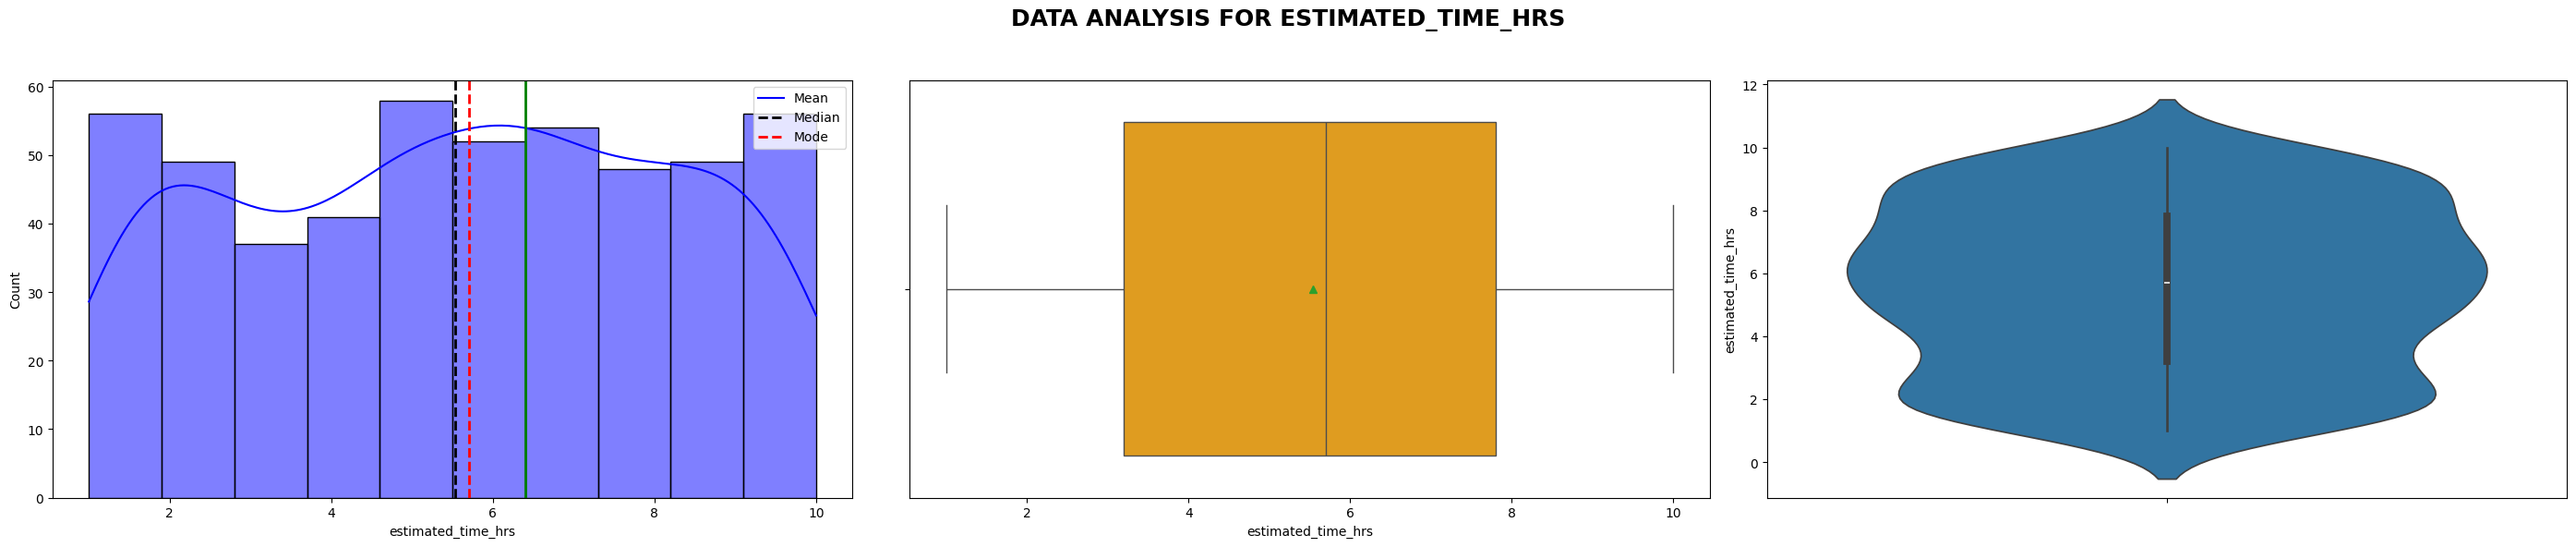

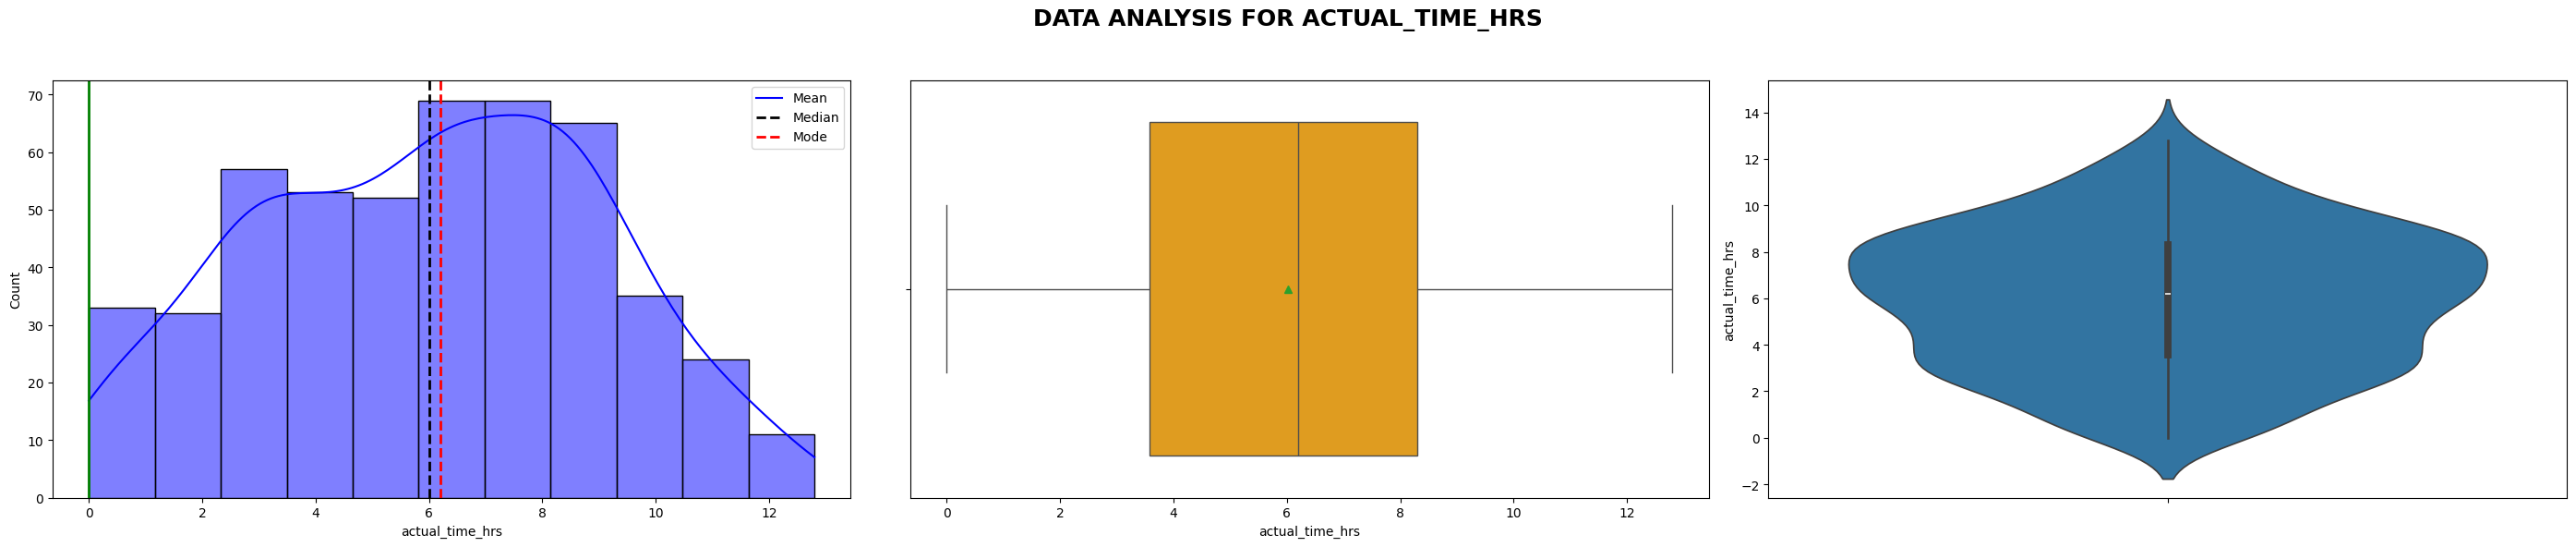

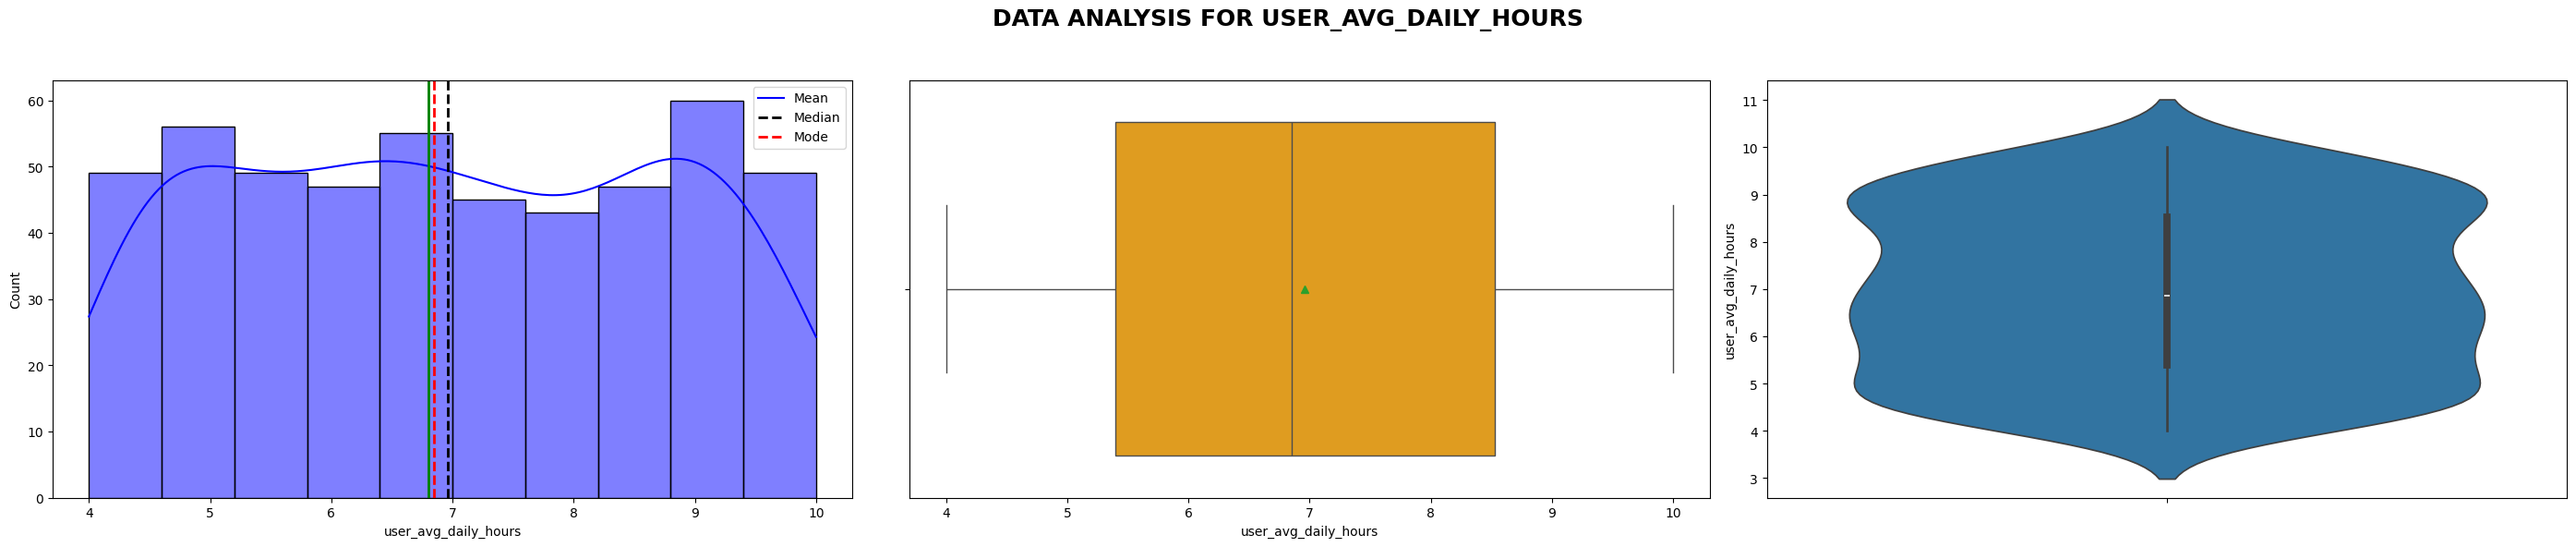

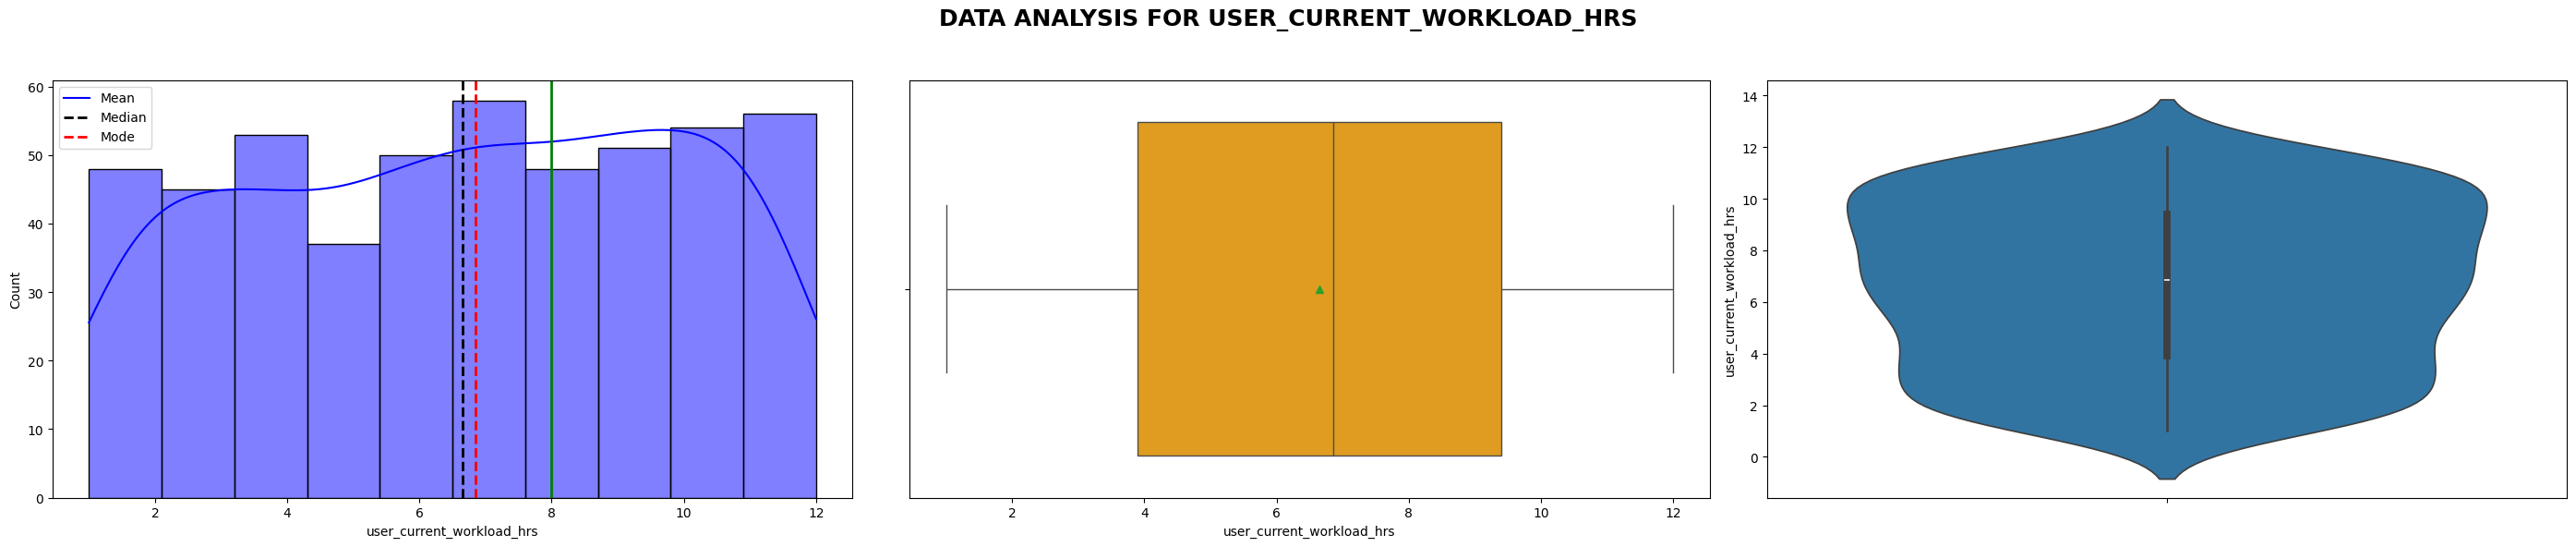

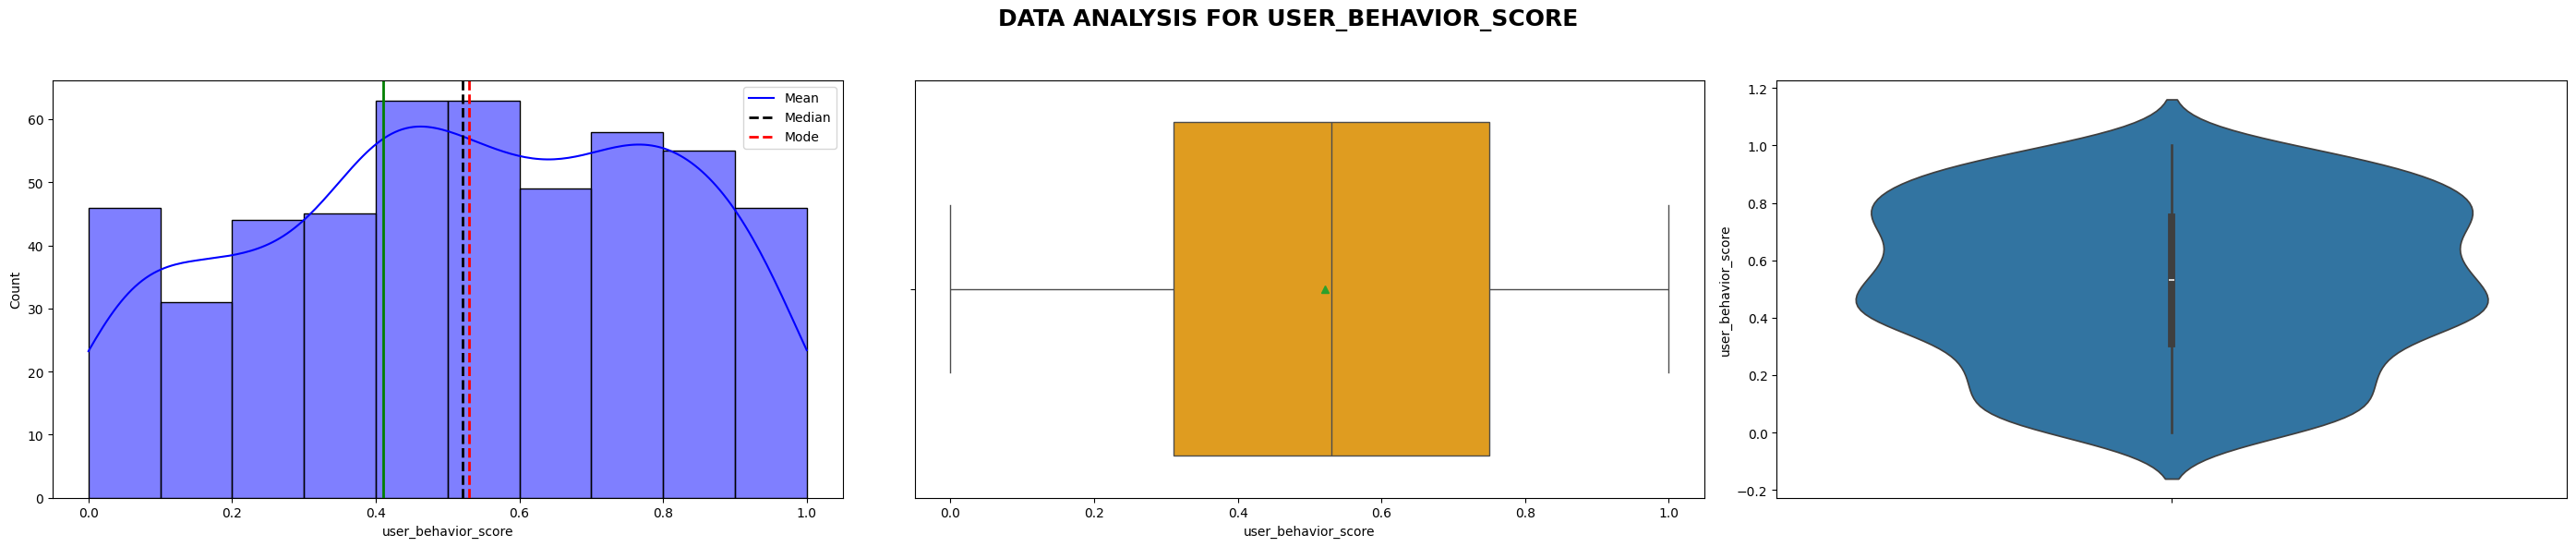

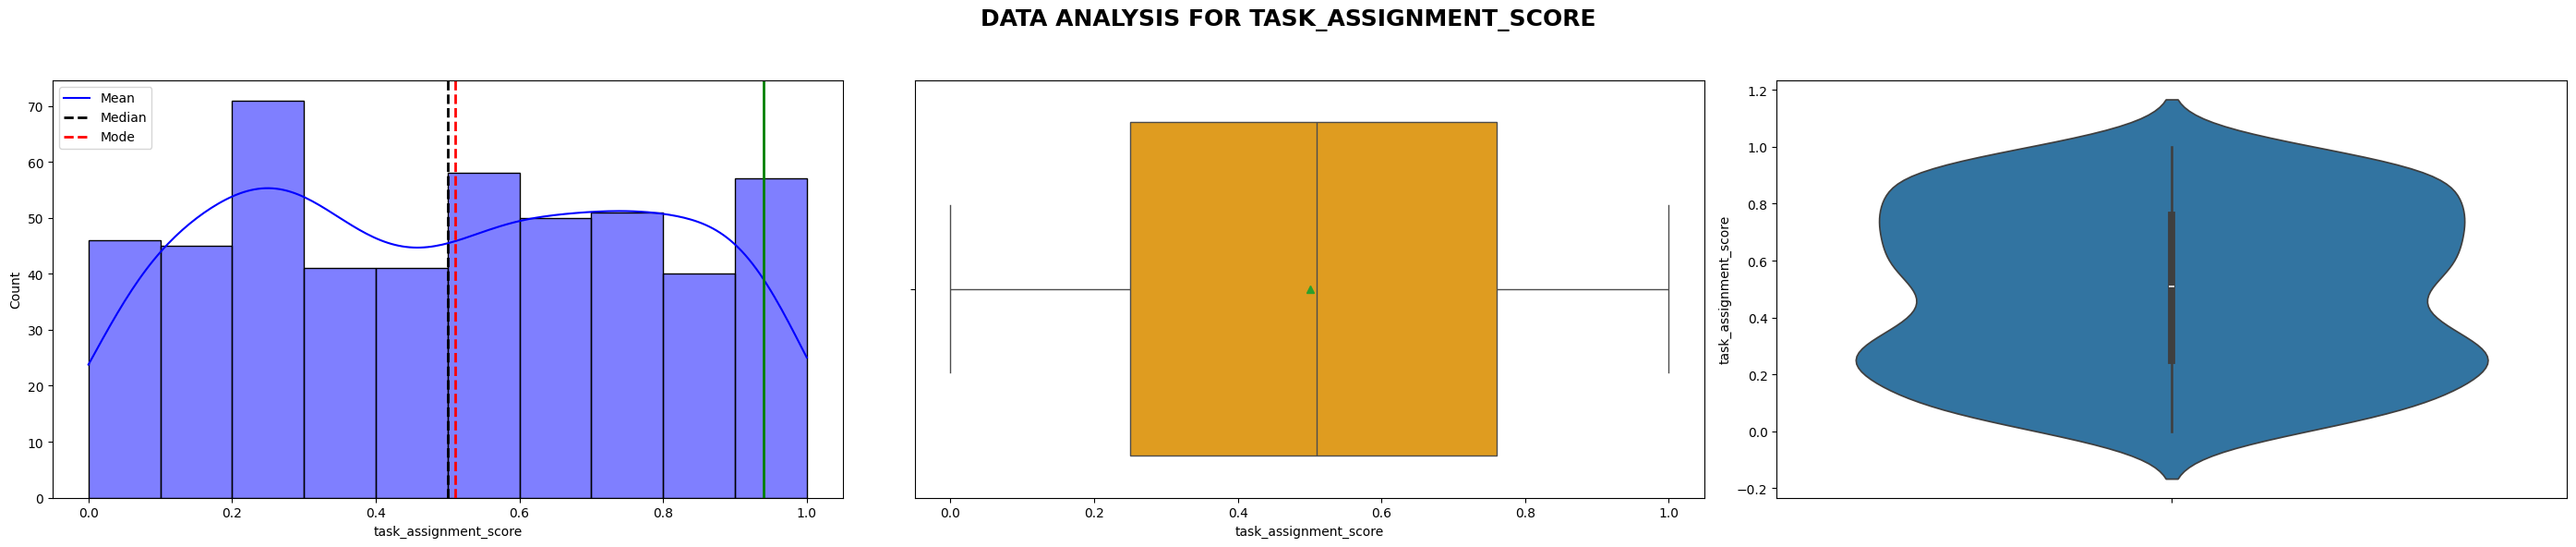

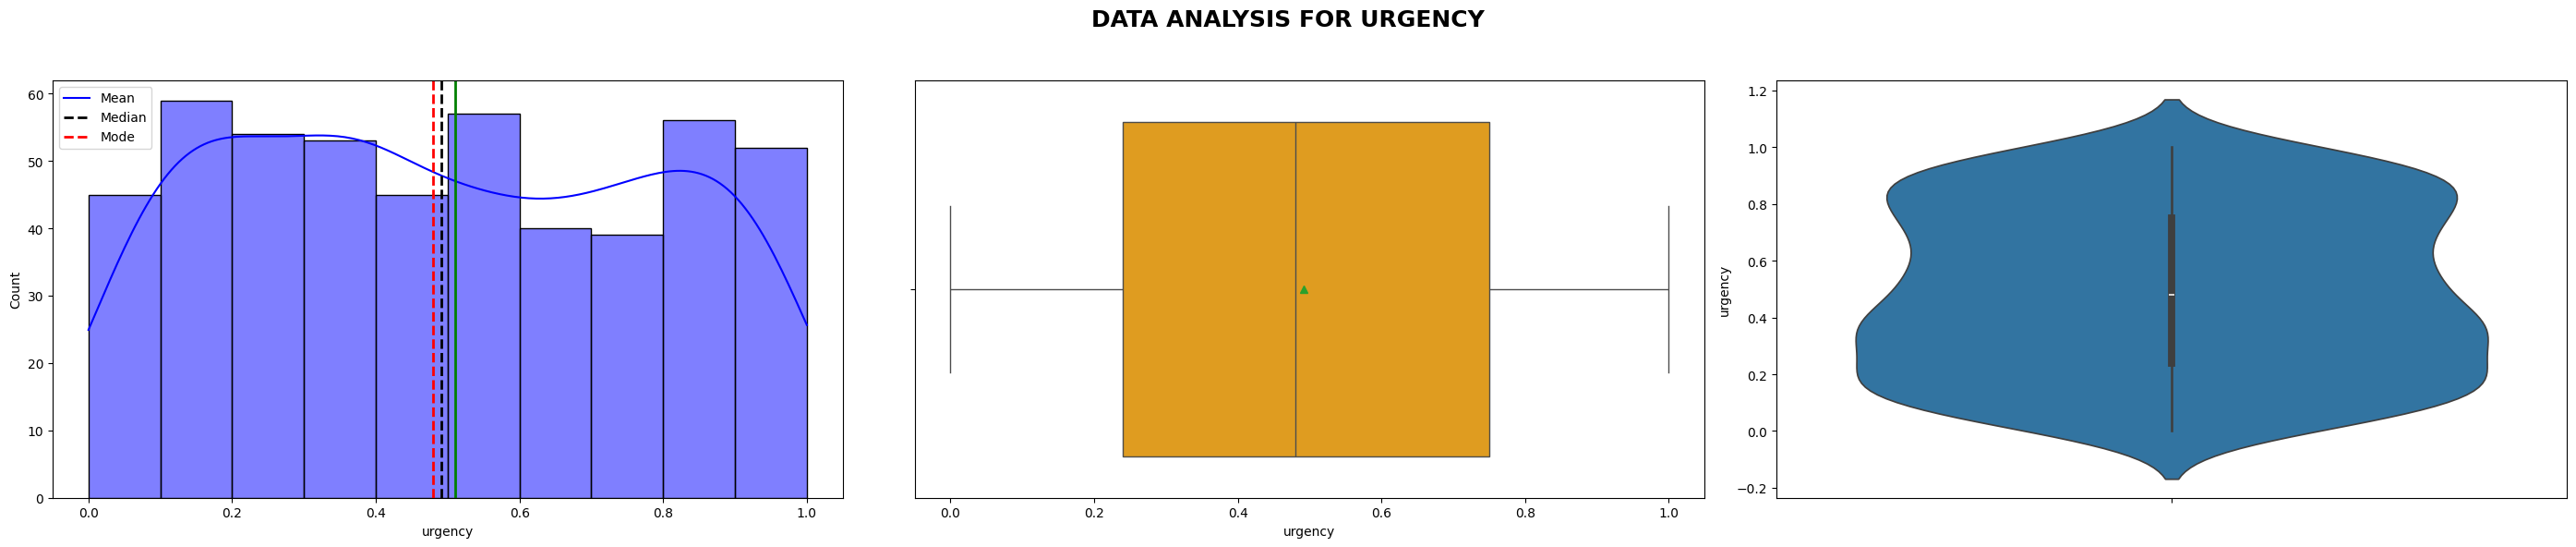

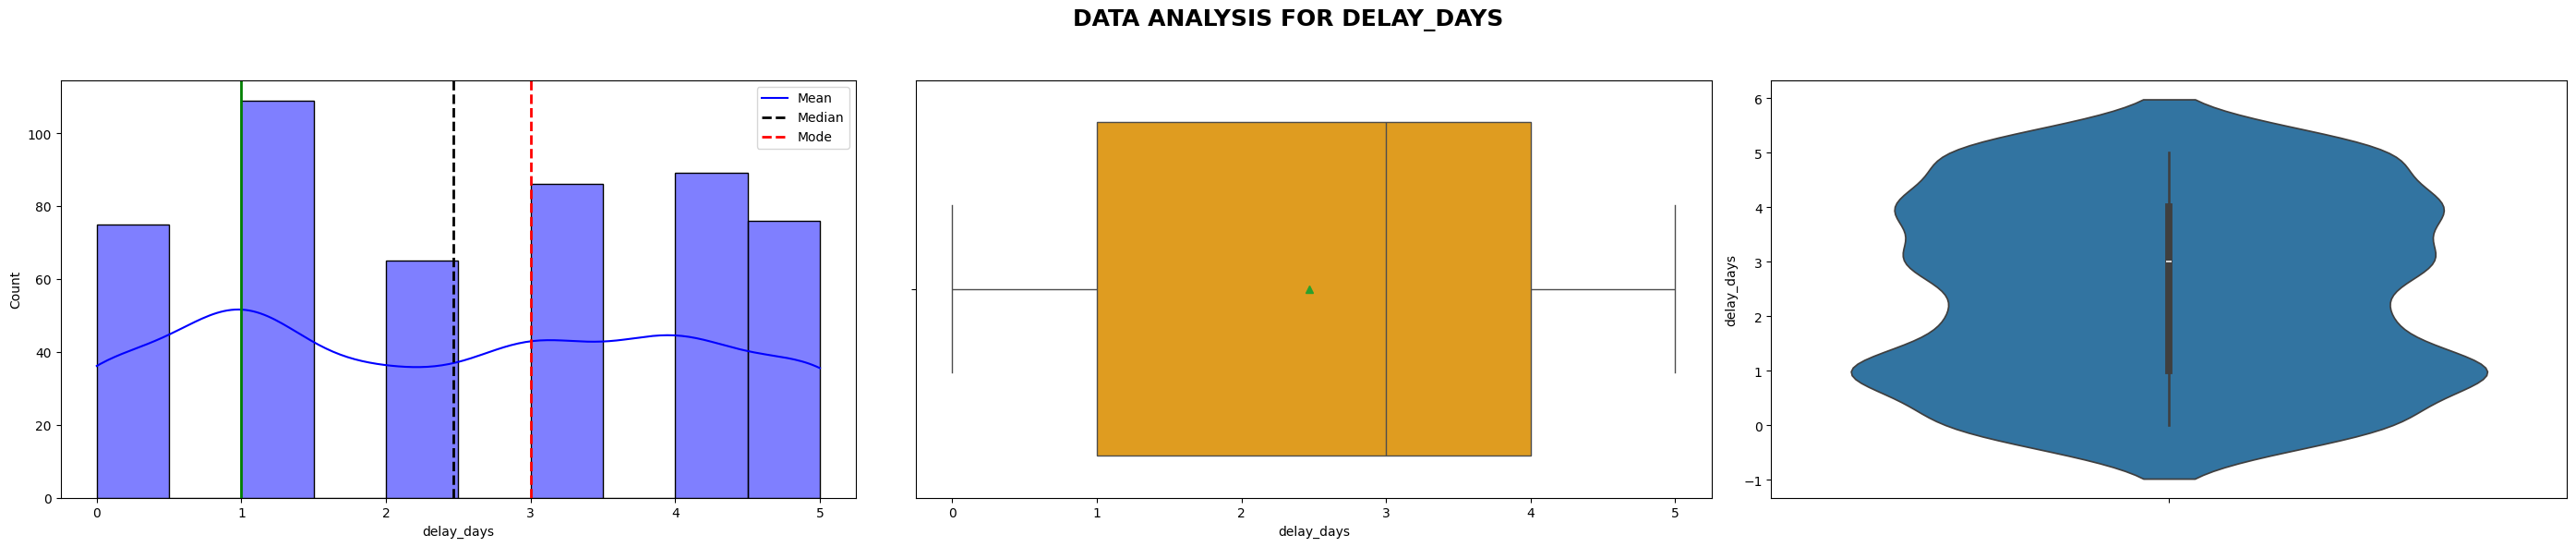

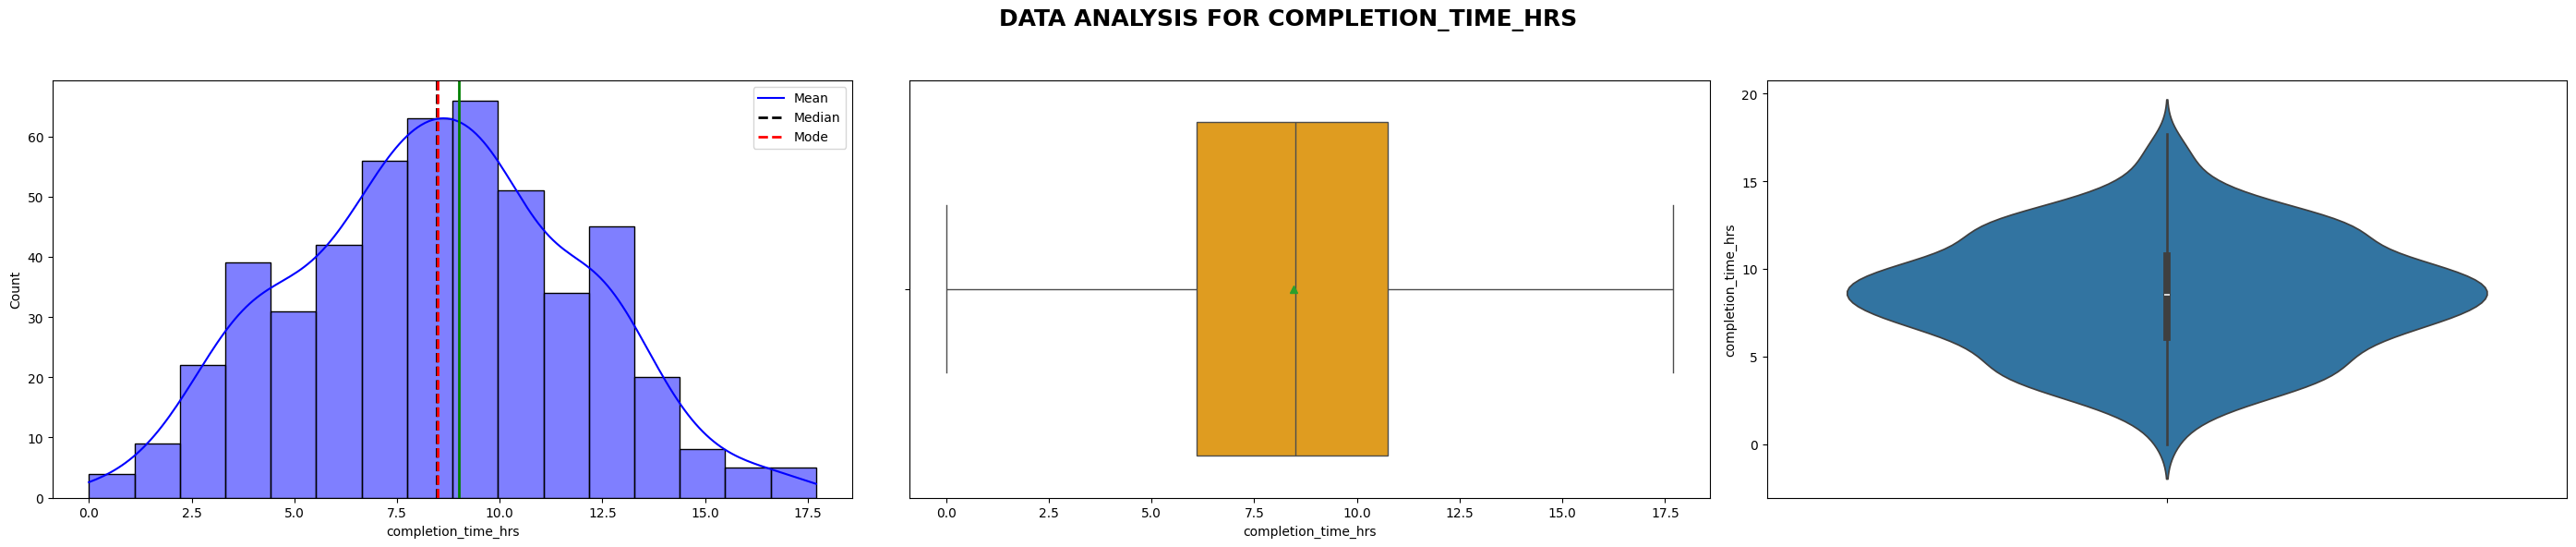

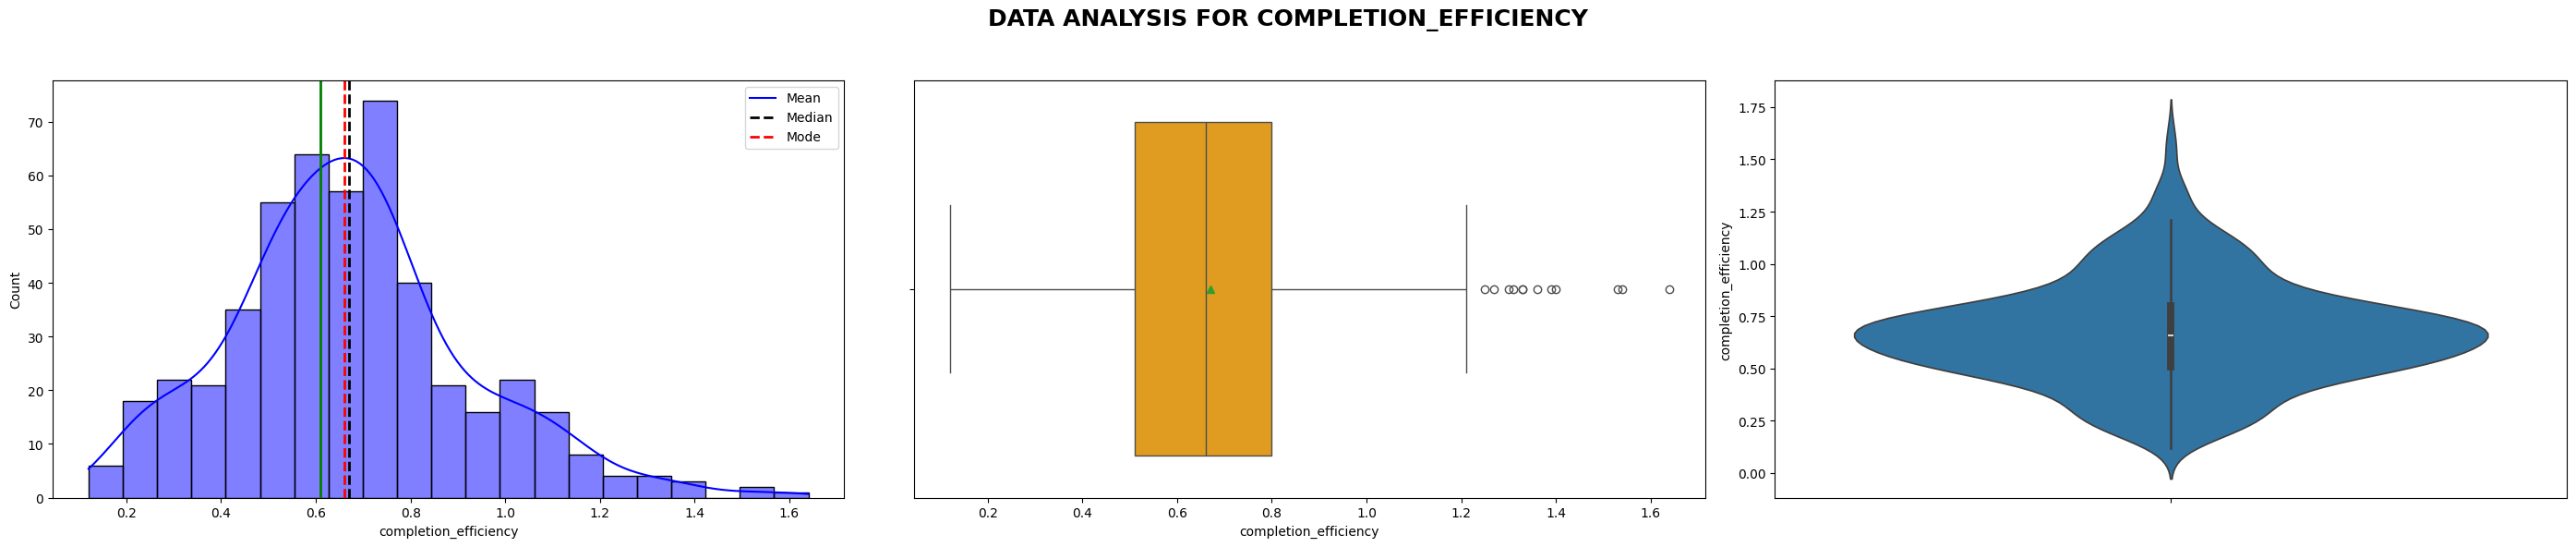

In [14]:
# Function to plot distplot, boxplot, and violin plot for a numerical column
def dist_box_violin(data):
    Name = data.name.upper()

    # Create the subplots
    fig, axes = plt.subplots(1, 3, figsize=(28, 6))
    fig.suptitle("DATA ANALYSIS FOR " + Name, fontsize=18, fontweight='bold')

    # Histplot (Replaced with histplot as distplot is deprecated)
    sns.histplot(data, kde=True, color='Blue', ax=axes[0])
    axes[0].axvline(data.mean(), color='black', linestyle='--', linewidth=2)
    axes[0].axvline(data.median(), color='r', linestyle='dashed', linewidth=2)
    axes[0].axvline(data.mode()[0], color='g', linestyle='solid', linewidth=2)
    axes[0].legend({'Mean': data.mean(), 'Median': data.median(), 'Mode': data.mode()[0]})

    # Boxplot
    sns.boxplot(x=data, showmeans=True, orient='h', color="orange", ax=axes[1])

    # Violin plot
    sns.violinplot(data, ax=axes[2])

    # Layout adjustment
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Adjust to fit the title
    plt.show()

# List of numerical columns
numerical_columns = ['estimated_time_hrs', 'actual_time_hrs', 'user_avg_daily_hours','user_current_workload_hrs', 'user_behavior_score', 'task_assignment_score',
    'urgency', 'delay_days', 'completion_time_hrs', 'completion_efficiency']

# Loop through each numerical column and apply the plotting function
for column in numerical_columns:
    dist_box_violin(df[column])

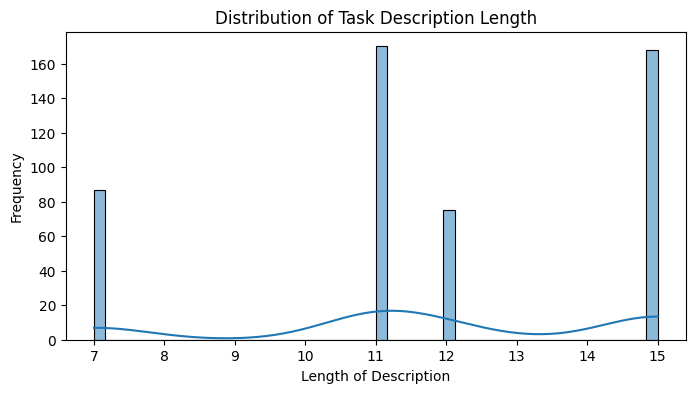

In [15]:
# --- Task Description Length ---
df['task_description_length'] = df['task_description'].astype(str).apply(len) # Ensure it's string before len
plt.figure(figsize=(8, 4))
sns.histplot(df['task_description_length'], kde=True, bins=50)
plt.title('Distribution of Task Description Length')
plt.xlabel('Length of Description')
plt.ylabel('Frequency')
plt.show()

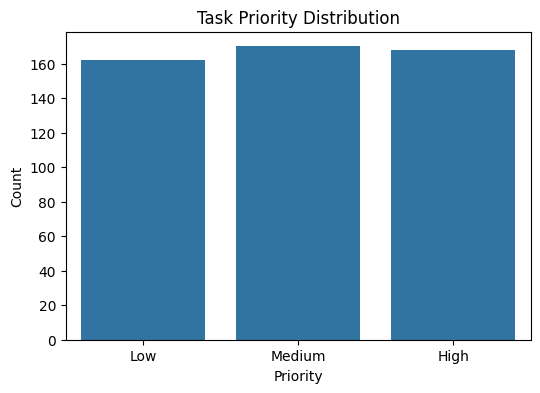

In [16]:
# --- Priority ---
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='priority', order=['Low', 'Medium', 'High'])
plt.title('Task Priority Distribution')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()

### **Bivariate Analysis**

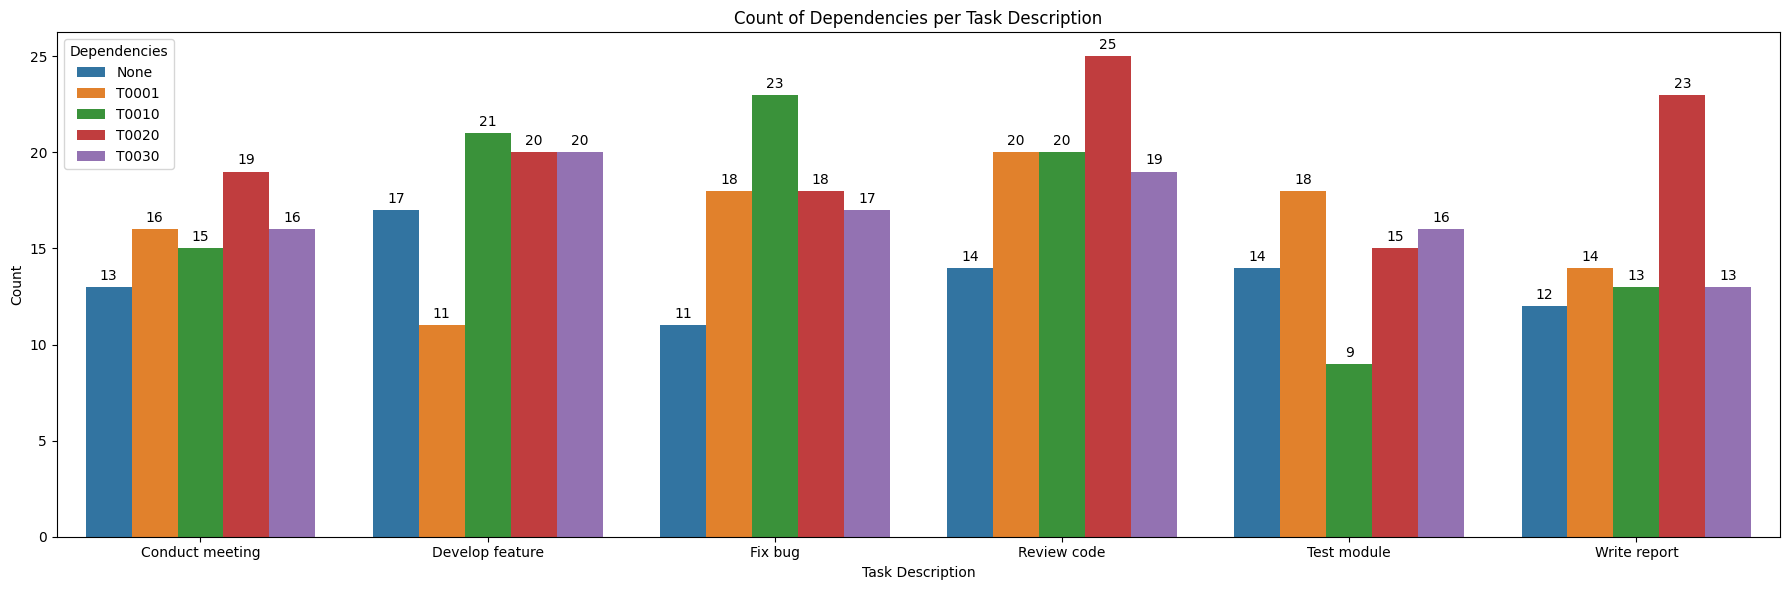

In [17]:
# Group the data
grouped_df = df.groupby(['task_description', 'dependencies']).size().reset_index(name='count')

# Plot using seaborn barplot
plt.figure(figsize=(18, 6))
ax = sns.barplot(
    data=grouped_df,
    x='task_description',
    y='count',
    hue='dependencies'
)

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# Customize the plot
plt.title('Count of Dependencies per Task Description')
plt.xlabel('Task Description', loc='center')
plt.ylabel('Count')
plt.xticks( ha='center')
plt.legend(title='Dependencies')
plt.tight_layout()
plt.show()

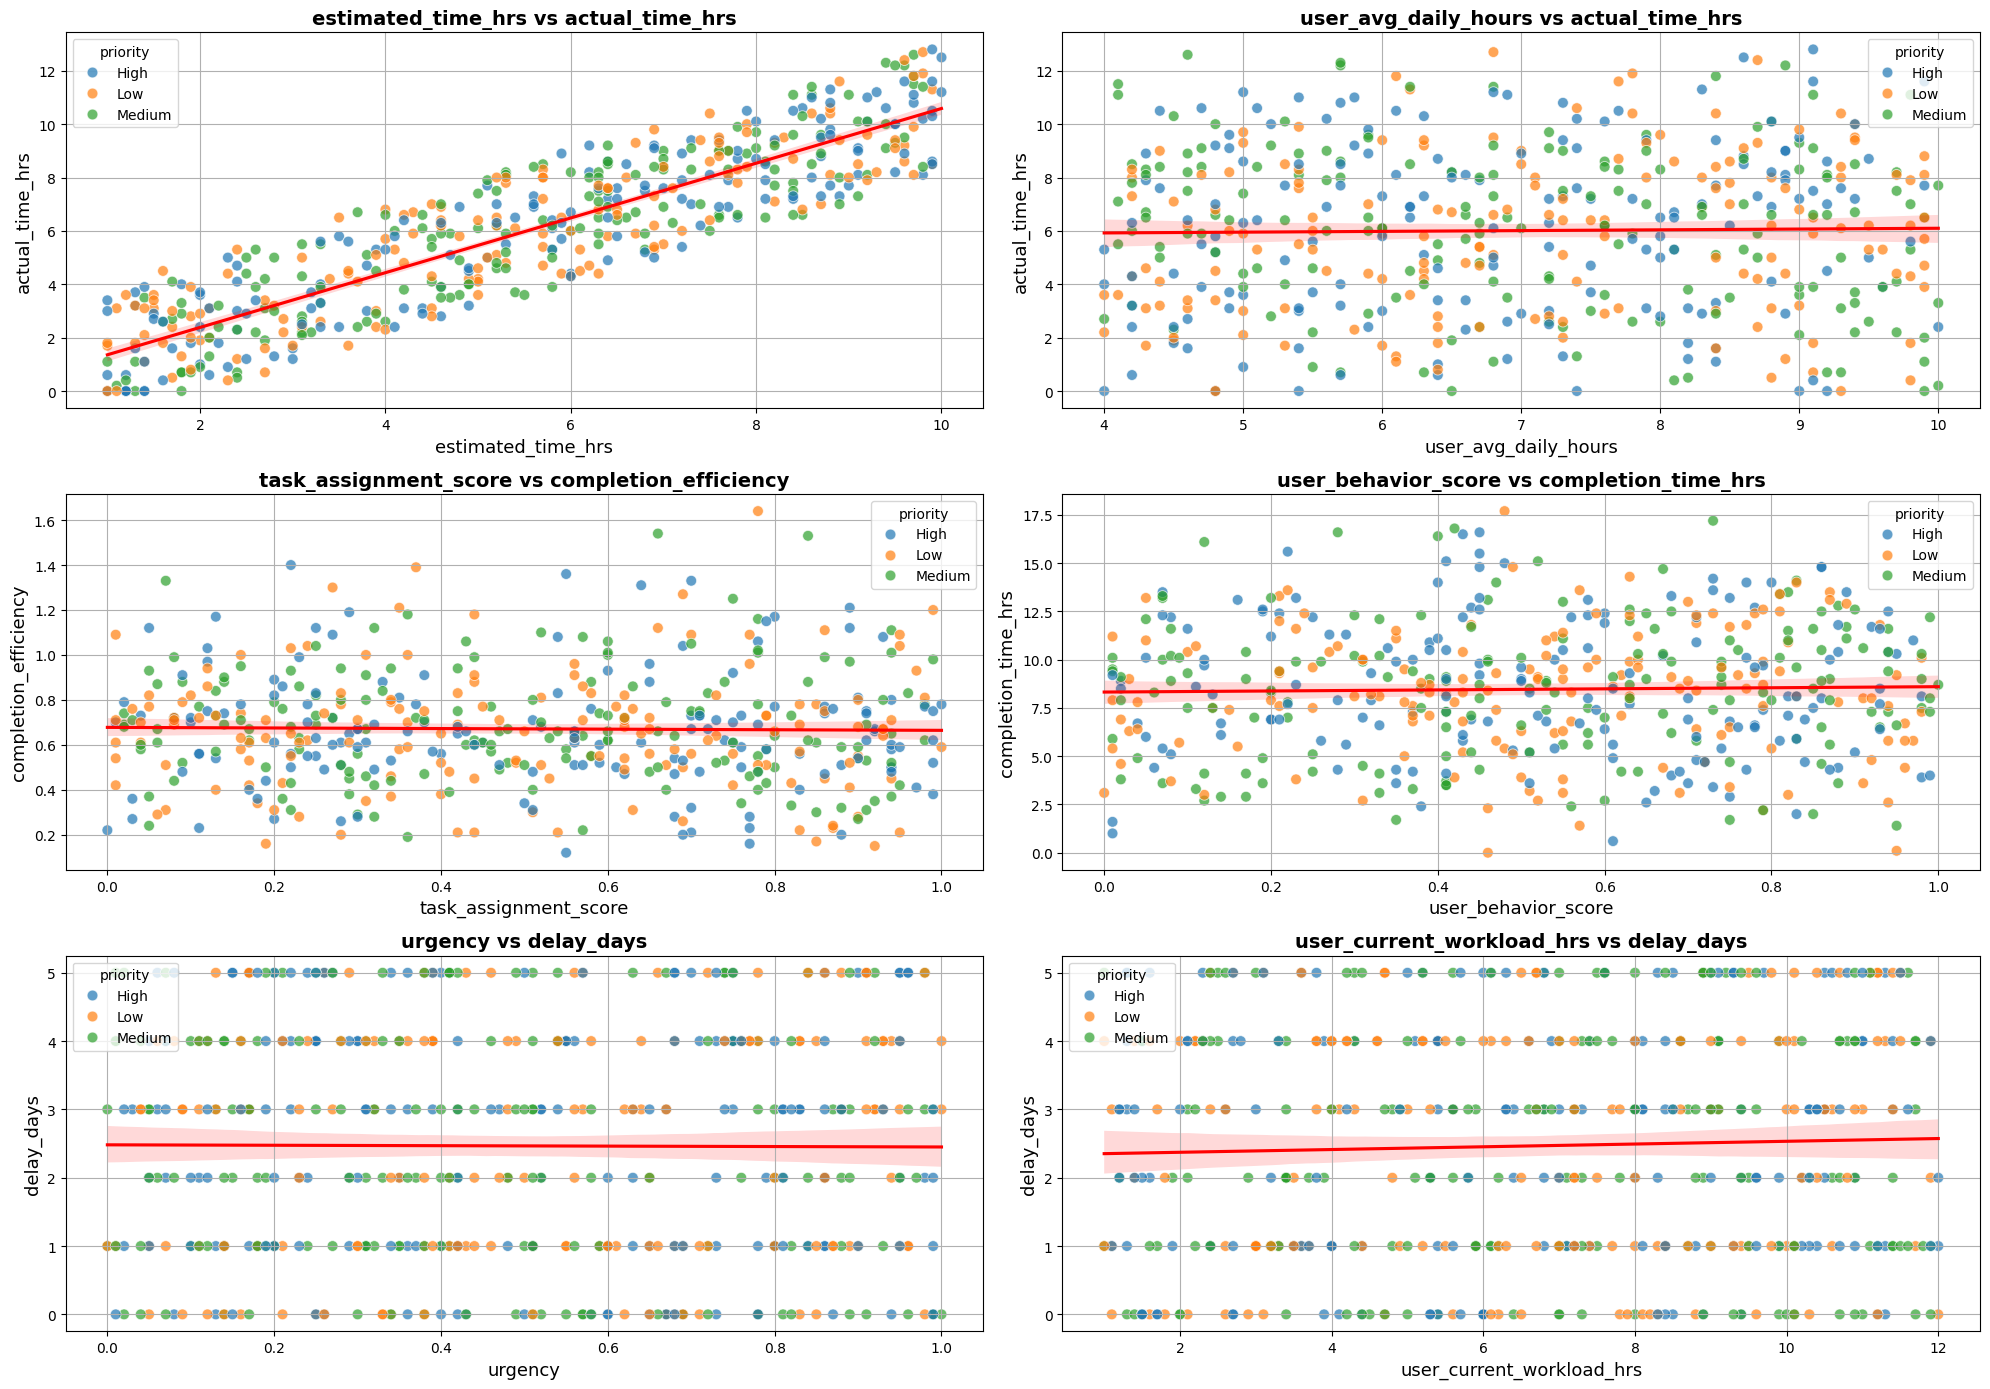

In [18]:
# Joint Plot
jointplot_pairs = [('estimated_time_hrs', 'actual_time_hrs'),
                    ('user_avg_daily_hours', 'actual_time_hrs'),
                    ('task_assignment_score', 'completion_efficiency'),
                    ('user_behavior_score', 'completion_time_hrs'),
                    ('urgency', 'delay_days'),
                    ('user_current_workload_hrs', 'delay_days')]

fig, axes = plt.subplots(3,2, figsize=(20, 14))
axes = axes.flatten()  # Flatten to loop easily

# Plot each pair with increased axis font size
for idx, (x, y) in enumerate(jointplot_pairs):
    ax = axes[idx]
    sns.scatterplot(data=df, x=x, y=y, ax=ax,hue='priority', alpha=0.7, s=60)
    sns.regplot(data=df, x=x, y=y, scatter=False, ax=ax, color='red')

    ax.set_title(f'{x} vs {y}', fontsize=14, fontweight='bold')
    ax.set_xlabel(x, fontsize=13)
    ax.set_ylabel(y, fontsize=13)
    ax.grid(True)

# Remove any unused subplot axes
for j in range(len(jointplot_pairs), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### **Multivariate Analysis**

In [19]:
pivot_ct = df.pivot_table(index=['task_description', 'priority'], values='completion_efficiency',aggfunc='mean').round(2)
pivot_ct.columns = ['avg_completion_efficiency']
pivot_ct

avg_completion_efficiency
task_description priority                           
Conduct meeting  High                           0.64
                 Low                            0.60
                 Medium                         0.73
Develop feature  High                           0.65
                 Low                            0.60
                 Medium                         0.72
Fix bug          High                           0.62
                 Low                            0.75
                 Medium                         0.70
Review code      High                           0.62
                 Low                            0.71
                 Medium                         0.68
Test module      High                           0.76
                 Low                            0.66
                 Medium                         0.61
Write report     High                           0.68
                 Low                            0.66
                 Medium                         0.69

- Medium priority tasks generally show higher efficiency for **Conduct meeting** and **Develop feature**.
- Low priority bug fixes have unexpectedly high efficiency, possibly due to task simplicity.
- High priority testing tasks achieve the highest efficiency.
- Writing reports shows consistent efficiency regardless of priority.
- Focus on medium priority tasks to optimize productivity balance.
- Review resource allocation for high priority bug fixes to improve efficiency.



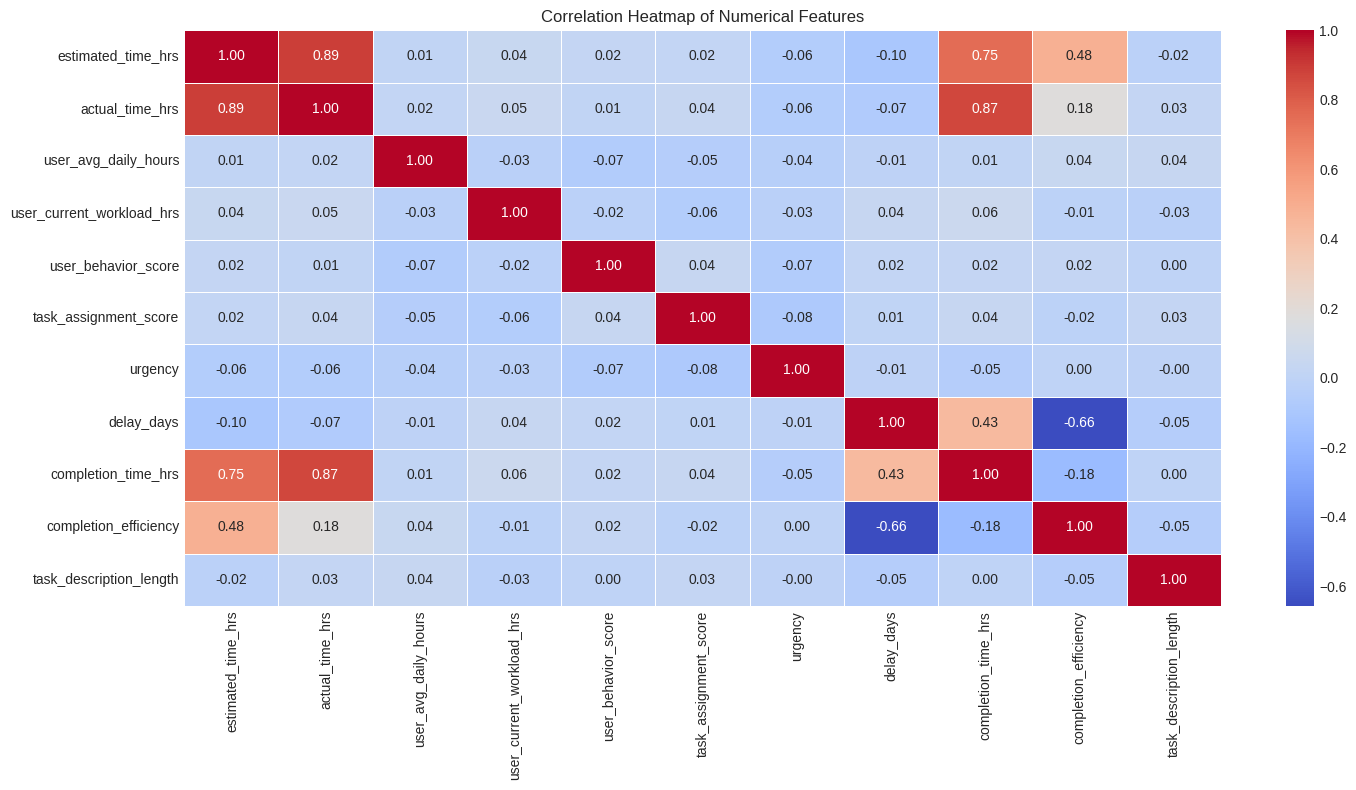

In [20]:
# --- Correlation Matrix for Numerical Features ---
plt.style.use('seaborn-v0_8-whitegrid') # Using a seaborn style
corr = df.corr(numeric_only=True)
# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

### **Observations**

| **Correlation Pair**                              | **Correlation Coefficient** | **Strength**       |**Insight**                                                                 |
|---------------------------------------------------|------------------------------|--------------------|------------------------------------------------------------------------------|
| `estimated_time_hrs` ↔ `actual_time_hrs`          | 0.89                         | Strong Positive     | Estimated time aligns closely with actual time – good estimation accuracy.   |
| `actual_time_hrs` ↔ `completion_time_hrs`         | 0.87                         | Strong Positive     | Actual time is a strong driver of total completion time.                     |
| `estimated_time_hrs` ↔ `completion_time_hrs`      | 0.75                         | Strong Positive     | Estimated time contributes significantly to completion time.                 |
| `completion_time_hrs` ↔ `delay_days`              | 0.43                         | Moderate Positive   | Longer completion times are moderately associated with more delays.          |
| `estimated_time_hrs` ↔ `completion_efficiency`    | 0.45                         | Moderate Positive   | Higher estimated times may lead to better planning and higher efficiency.    |
| `delay_days` ↔ `completion_efficiency`            | -0.66                        | Strong Negative     | More delay strongly reduces efficiency – a critical operational metric.      |


## NLP Text Preprocessing

The code below preprocesses the **task_description** text by lowercasing, removing punctuation, tokenizing, eliminating common stopwords, and lemmatizing words to their root forms. This cleaning transforms the raw text into a standardized and meaningful format stored in the new **processed_description** column, making it suitable for feature extraction methods like TF-IDF or word embeddings.

In [21]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Use LookupError consistently for nltk.data.find failures
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("Downloading punkt...") # Added print for clarity
    nltk.download('punkt', quiet=True)

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("Downloading stopwords...") # Added print for clarity
    nltk.download('stopwords', quiet=True)

# Use LookupError for checking and catching download failures
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    print("Downloading wordnet and omw-1.4...") # Added print for clarity
    nltk.download('wordnet', quiet=True)
    # Download omw-1.4 here as it's related to wordnet
    nltk.download('omw-1.4', quiet=True)

# Add download for punkt_tab which is needed by word_tokenize
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    print("Downloading punkt_tab...") # Added print for clarity
    nltk.download('punkt_tab', quiet=True)




In [22]:
if not df.empty:
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    def preprocess_text(text):
        # Handle NaN or non-string values
        if pd.isna(text) or not isinstance(text, str):
            return ""

        text = text.lower() # 1. Lowercasing
        text = re.sub(r'[^\w\s]', '', text) # 2. Punctuation Removal (keeps alphanumeric and whitespace)
        tokens = word_tokenize(text) # 3. Tokenization

        # 4. Stopword Removal & 5. Lemmatization
        processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.strip()]

        return ' '.join(processed_tokens)

    print("\nPreprocessing 'task_description'...")
    # Apply preprocessing
    # Ensure 'task_description' is string type to avoid errors if it contains numbers or other types
    df['processed_description'] = df['task_description'].astype(str).apply(preprocess_text)
    print("Preprocessing complete.")

    # %% [markdown]
    # ### 3.3. Review Preprocessed Text

    # %%
    print("\n--- Original vs. Processed Task Descriptions (First 5) ---")
    print(df[['task_description', 'processed_description']].head())

    # Quick word frequency analysis on processed descriptions (optional, but good for a sanity check)
    from collections import Counter
    all_processed_words = ' '.join(df['processed_description']).split()
    word_counts = Counter(all_processed_words)
    print("\n--- Top 10 most common words in processed descriptions ---")
    print(word_counts.most_common(10))

else:
    print("DataFrame is empty. Skipping NLP preprocessing.")




Preprocessing 'task_description'...
Preprocessing complete.

--- Original vs. Processed Task Descriptions (First 5) ---
  task_description processed_description
0     Write report          write report
1      Review code           review code
2      Test module           test module
3  Develop feature       develop feature
4      Review code           review code

--- Top 10 most common words in processed descriptions ---
[('review', 98), ('code', 98), ('develop', 89), ('feature', 89), ('fix', 87), ('bug', 87), ('conduct', 79), ('meeting', 79), ('write', 75), ('report', 75)]


In [23]:
df.columns

Index(['user_id', 'task_id', 'task_description', 'priority', 'deadline', 'estimated_time_hrs', 'actual_time_hrs', 'user_avg_daily_hours', 'user_current_workload_hrs', 'user_behavior_score', 'task_assignment_score', 'dependencies', 'urgency', 'delay_days', 'completion_time_hrs', 'completion_efficiency', 'task_description_length', 'processed_description'], dtype='object')

In [24]:
df = df[['user_id', 'task_id', 'task_description', 'processed_description','task_description_length','priority', 'deadline', 'estimated_time_hrs', 'actual_time_hrs', 'user_avg_daily_hours', 'user_current_workload_hrs', 'user_behavior_score', 'task_assignment_score', 'dependencies', 'urgency', 'delay_days', 'completion_time_hrs', 'completion_efficiency']]

In [25]:
df.to_csv('cleaned_ai_powered_task_management_dataset.csv', index=False)

---------------------------------------------
------------------------------------------

In [26]:
df1 = pd.read_csv('cleaned_ai_powered_task_management_dataset.csv')
print("Cleaned dataset loaded successfully!")
df1.head(3)

Cleaned dataset loaded successfully!


,user_id,task_id,task_description,processed_description,task_description_length,priority,deadline,estimated_time_hrs,actual_time_hrs,user_avg_daily_hours,user_current_workload_hrs,user_behavior_score,task_assignment_score,dependencies,urgency,delay_days,completion_time_hrs,completion_efficiency
0,U052,T0000,Write report,write report,12,Medium,2025-06-08,8.6,11.1,9.1,9.2,0.12,0.91,T0020,0.20,5,16.1,0.53
1,U093,T0001,Review code,review code,11,High,2025-05-26,8.6,11.0,5.4,7.0,0.80,0.64,T0020,0.39,3,14.0,0.61
2,U015,T0002,Test module,test module,11,Low,2025-06-02,9.6,9.2,6.3,1.6,0.62,0.95,T0030,0.05,0,9.2,1.04


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    500 non-null    object 
 1   task_id                    500 non-null    object 
 2   task_description           500 non-null    object 
 3   processed_description      500 non-null    object 
 4   task_description_length    500 non-null    int64  
 5   priority                   500 non-null    object 
 6   deadline                   500 non-null    object 
 7   estimated_time_hrs         500 non-null    float64
 8   actual_time_hrs            500 non-null    float64
 9   user_avg_daily_hours       500 non-null    float64
 10  user_current_workload_hrs  500 non-null    float64
 11  user_behavior_score        500 non-null    float64
 12  task_assignment_score      500 non-null    float64
 13  dependencies               419 non-null    object 

In [28]:
def extract_task_type(description):
    description = str(description).lower().strip()
    task_keywords = {
        'write': 'Write Report',
        'review': 'Review Code',
        'test': 'Test Module',
        'develop': 'Develop Feature',
        'conduct': 'Conduct Meeting',
        'fix': 'Fix Bug'
    }

    for verb, task_type in task_keywords.items():
        if verb in description or description.startswith(verb):
            return task_type

    # Fallback: try to infer from the first word
    first_word = description.split()[0] if description else 'other'
    return task_keywords.get(first_word, 'Other')

# Apply to DataFrame
df1['task_type'] = df1['task_description'].apply(extract_task_type)

# Display distribution
print("\n--- Task Type Distribution ---")
print(df1['task_type'].value_counts())


--- Task Type Distribution ---
task_type
Review Code        98
Develop Feature    89
Fix Bug            87
Conduct Meeting    79
Write Report       75
Test Module        72
Name: count, dtype: int64


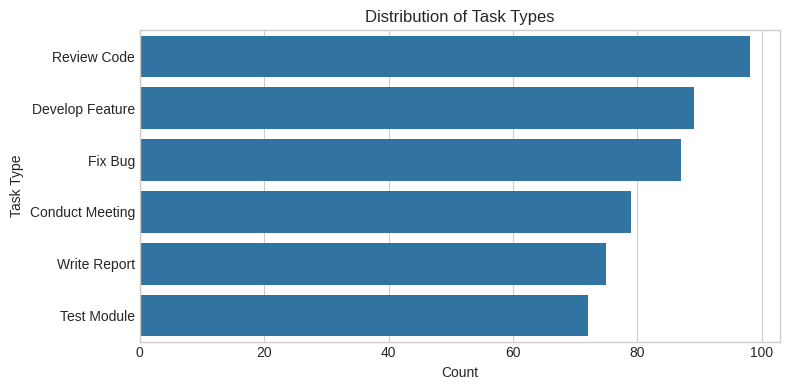

In [29]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df1, y='task_type', order=df1['task_type'].value_counts().index)
plt.title('Distribution of Task Types')
plt.xlabel('Count')
plt.ylabel('Task Type')
plt.tight_layout()
plt.show()


The task type distribution is fairly balanced, with each class having between 72 and 98 samples. This supports effective stratified splitting and helps models learn without severe class imbalance issues.

# **Model Development & Evaluation**

In [30]:
# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Feature extraction and preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier

# Exceptions
from sklearn.exceptions import NotFittedError



## **Task Type Classification Model**
* A ML model built to automatically categorize tasks into predefined types (e.g., Review Code, Fix Bug, Write Report) based on their descriptions.

* The model processes the textual task description (often with techniques like TF-IDF or word embeddings) to extract meaningful features that help it distinguish between different task types.

* Its output is the predicted task type label, which helps organize tasks and can improve downstream processes like priority setting or resource allocation.


In [31]:
X = df1['processed_description']
y = df1['task_type']

The code below handles data filtering for classification and ensures stratified train-test splitting with attention to rare classes

In [32]:
def prepare_classification_data(df, text_col, label_col, min_samples_per_class=2, test_size=0.25, random_state=42, verbose=True):
    """
    Prepares text classification data by:
    - Filtering out rare classes
    - Checking for minimum class count
    - Performing stratified train-test split

    Returns:
        X_train, X_test, y_train, y_test (or None if not enough classes)
    """
    y = df[label_col]
    value_counts = y.value_counts()
    to_remove = value_counts[value_counts < min_samples_per_class].index

    if not to_remove.empty and verbose:
        print(f"\nRemoving classes with < {min_samples_per_class} samples: {to_remove.tolist()}")

    df_filtered = df[~df[label_col].isin(to_remove)]
    X = df_filtered[text_col]
    y = df_filtered[label_col]

    if y.nunique() < 2:
        if verbose:
            print("\n❌ Not enough classes for classification. Need at least 2.")
        return None, None, None, None

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

    if verbose:

        print(f"Training size: {X_train.shape[0]} \nTest size: {X_test.shape[0]}")
        print("--"*40)
        print("Training class distribution:\n", y_train.value_counts(normalize=True))
        print("--"*40)
        print("Test class distribution:\n", y_test.value_counts(normalize=True))

    return X_train, X_test, y_train, y_test

In [33]:
X_train, X_test, y_train, y_test = prepare_classification_data(df1, text_col='processed_description', label_col='task_type')

Training size: 375 
Test size: 125
--------------------------------------------------------------------------------
Training class distribution:
 task_type
Review Code        0.197333
Develop Feature    0.178667
Fix Bug            0.173333
Conduct Meeting    0.157333
Write Report       0.149333
Test Module        0.144000
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Test class distribution:
 task_type
Review Code        0.192
Fix Bug            0.176
Develop Feature    0.176
Conduct Meeting    0.160
Write Report       0.152
Test Module        0.144
Name: proportion, dtype: float64


**Observations:**

* All classes are relatively evenly represented (no class is below ~14% or above ~20%).

* There's no major class imbalance,hence no need for oversampling or undersampling at this stage.

### **TF-IDF based Classification Models**

In [34]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2)) # Consider unigrams and bigrams

In [35]:
def evaluate_model(model, X_test_features, y_test_actual, model_name="Model"):
    """Helper function to evaluate a classification model."""

    y_pred = model.predict(X_test_features)
    accuracy = accuracy_score(y_test_actual, y_pred)
    print(f"\n {model_name} Evaluation ")
    print(f"\n > Accuracy: {accuracy:.4f}\n")
    print("Classification Report:")

    labels = sorted(list(set(y_test_actual) | set(y_pred)))
    print(classification_report(y_test_actual, y_pred, zero_division=0, labels=labels))

    # Code below was previously in a separate cell and had an indentation error
    cm = confusion_matrix(y_test_actual, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    return accuracy, classification_report(y_test_actual, y_pred, zero_division=0, output_dict=True, labels=labels)


 Naive Bayes with TF-IDF Evaluation 

 > Accuracy: 1.0000

Classification Report:
                 precision    recall  f1-score   support

Conduct Meeting       1.00      1.00      1.00        20
Develop Feature       1.00      1.00      1.00        22
        Fix Bug       1.00      1.00      1.00        22
    Review Code       1.00      1.00      1.00        24
    Test Module       1.00      1.00      1.00        18
   Write Report       1.00      1.00      1.00        19

       accuracy                           1.00       125
      macro avg       1.00      1.00      1.00       125
   weighted avg       1.00      1.00      1.00       125



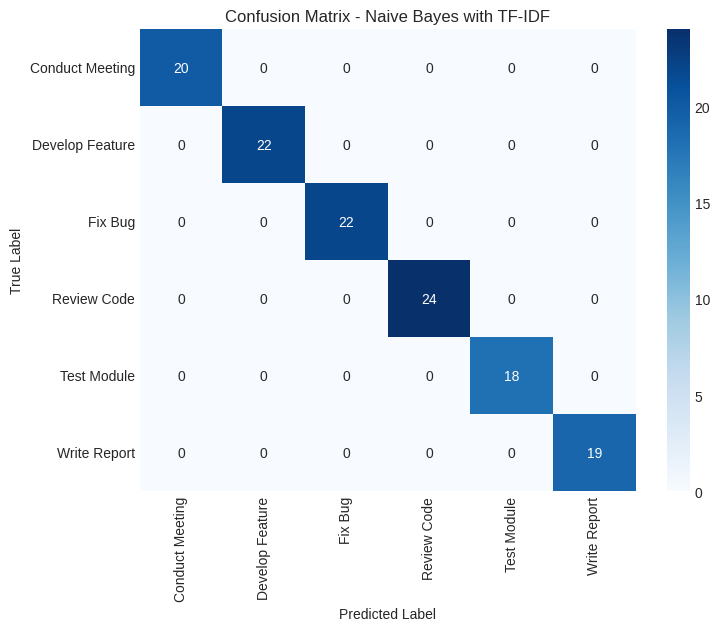

________________________________________________________________________________________________________________________________________________________________

 Random Forest with TF-IDF Evaluation 

 > Accuracy: 1.0000

Classification Report:
                 precision    recall  f1-score   support

Conduct Meeting       1.00      1.00      1.00        20
Develop Feature       1.00      1.00      1.00        22
        Fix Bug       1.00      1.00      1.00        22
    Review Code       1.00      1.00      1.00        24
    Test Module       1.00      1.00      1.00        18
   Write Report       1.00      1.00      1.00        19

       accuracy                           1.00       125
      macro avg       1.00      1.00      1.00       125
   weighted avg       1.00      1.00      1.00       125



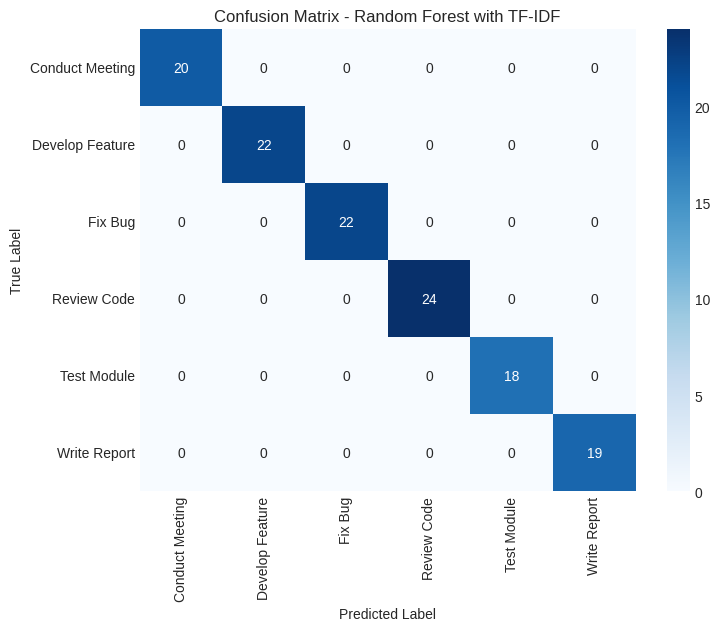

________________________________________________________________________________________________________________________________________________________________

 Logistic Regression with TF-IDF Evaluation 

 > Accuracy: 1.0000

Classification Report:
                 precision    recall  f1-score   support

Conduct Meeting       1.00      1.00      1.00        20
Develop Feature       1.00      1.00      1.00        22
        Fix Bug       1.00      1.00      1.00        22
    Review Code       1.00      1.00      1.00        24
    Test Module       1.00      1.00      1.00        18
   Write Report       1.00      1.00      1.00        19

       accuracy                           1.00       125
      macro avg       1.00      1.00      1.00       125
   weighted avg       1.00      1.00      1.00       125



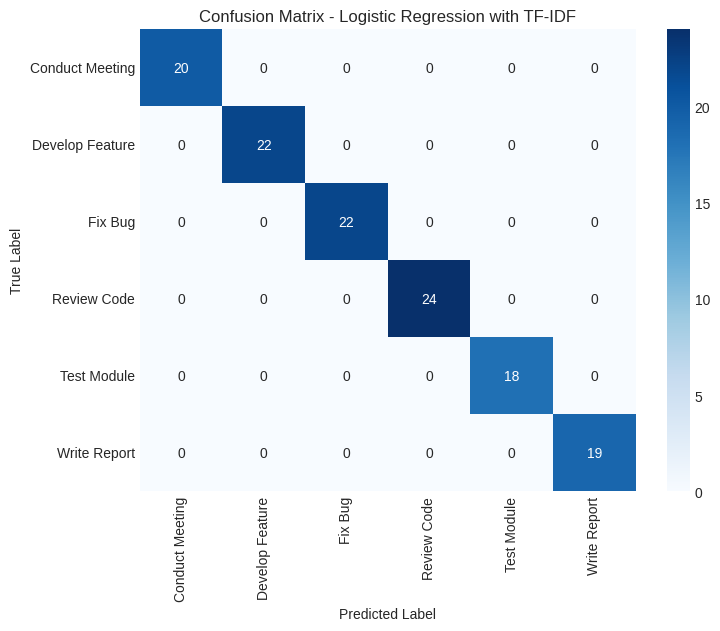

________________________________________________________________________________________________________________________________________________________________

 Linear SVM with TF-IDF Evaluation 

 > Accuracy: 1.0000

Classification Report:
                 precision    recall  f1-score   support

Conduct Meeting       1.00      1.00      1.00        20
Develop Feature       1.00      1.00      1.00        22
        Fix Bug       1.00      1.00      1.00        22
    Review Code       1.00      1.00      1.00        24
    Test Module       1.00      1.00      1.00        18
   Write Report       1.00      1.00      1.00        19

       accuracy                           1.00       125
      macro avg       1.00      1.00      1.00       125
   weighted avg       1.00      1.00      1.00       125



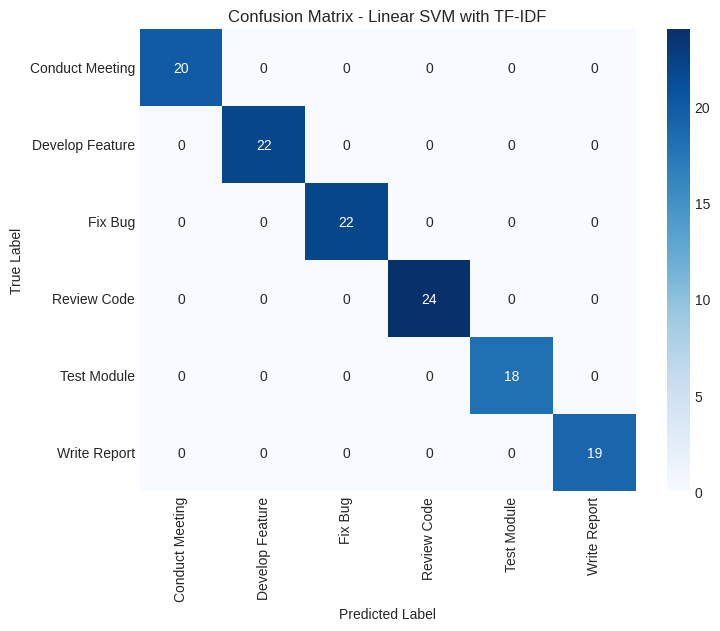

In [36]:
# Naive Bayes with TF-IDF
if 'X_train' in locals(): # Check if splitting was successful
    # Create a pipeline
    nb_tfidf_pipeline = Pipeline([('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),('nb', MultinomialNB())])
    nb_tfidf_pipeline.fit(X_train, y_train)
    nb_accuracy, nb_report = evaluate_model(nb_tfidf_pipeline, X_test, y_test, "Naive Bayes with TF-IDF")
else:
    print("Skipping TF-IDF Naive Bayes training as data splitting failed.")

print("____"*40)

# Random Forest with TF-IDF
if 'X_train' in locals() and X_train is not None:
    rf_pipeline = Pipeline([('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42))])


    rf_pipeline.fit(X_train, y_train)
    rf_accuracy, rf_report=evaluate_model(rf_pipeline, X_test, y_test, model_name="Random Forest with TF-IDF")
else:
    print("⚠️ Skipping Random Forest training: data split unsuccessful.")

print("____"*40)

# Logistic Regression with TF-IDF
if 'X_train' in locals() and X_train is not None:
    lr_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
        ('lr', LogisticRegression(max_iter=1000, random_state=42))])


    lr_pipeline.fit(X_train, y_train)
    lr_accuracy, lr_report=evaluate_model(lr_pipeline, X_test, y_test, model_name="Logistic Regression with TF-IDF")
else:
    print("⚠️ Skipping Logistic Regression training: data split unsuccessful.")

print("____"*40)

# Linear SVM with TF-IDF
if 'X_train' in locals():
    svm_tfidf_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
        ('svm', LinearSVC(random_state=42, C=1.0, max_iter=2000))]) # LinearSVC is often good for text


    svm_tfidf_pipeline.fit(X_train, y_train)
    svm_accuracy, svm_report=evaluate_model(svm_tfidf_pipeline, X_test, y_test, "Linear SVM with TF-IDF")
else:
    print("Skipping TF-IDF SVM training as data splitting failed.")

In [37]:
comparison_data = {
    "Model": ["Naive Bayes", "Random Forest", "Logistic Regression", "Linear SVM"],
    "Accuracy": [nb_accuracy, rf_accuracy, lr_accuracy, svm_accuracy],

    "Precision (Weighted)": [
        nb_report["weighted avg"]["precision"],
        rf_report["weighted avg"]["precision"],
        lr_report["weighted avg"]["precision"],
        svm_report["weighted avg"]["precision"]
    ],
    "Recall (Weighted)": [
        nb_report["weighted avg"]["recall"],
        rf_report["weighted avg"]["recall"],
        lr_report["weighted avg"]["recall"],
        svm_report["weighted avg"]["recall"]
    ],
    "F1-score (Weighted)": [
        nb_report["weighted avg"]["f1-score"],
        rf_report["weighted avg"]["f1-score"],
        lr_report["weighted avg"]["f1-score"],
        svm_report["weighted avg"]["f1-score"]
    ]
}

results_df = pd.DataFrame(comparison_data)
print("\n📊 Model comparison summary for TF-IDF based classification models:\n")
display(results_df.round(4))


📊 Model comparison summary for TF-IDF based classification models:



,Model,Accuracy,Precision (Weighted),Recall (Weighted),F1-score (Weighted)
0,Naive Bayes,1.0,1.0,1.0,1.0
1,Random Forest,1.0,1.0,1.0,1.0
2,Logistic Regression,1.0,1.0,1.0,1.0
3,Linear SVM,1.0,1.0,1.0,1.0


### **Observations**
* All models (Naive Bayes, Random Forest, Logistic Regression, Linear SVM) achieved perfect accuracy and metrics using TF-IDF features.

* This indicates the features are highly discriminative for the task type classification.

* The dataset is likely well-structured or contains clearly separable classes.

* Perfect scores may also suggest potential data leakage or insufficiently randomized train/test splits—worth verifying.

* Given identical performance, simpler models like Naive Bayes or Logistic Regression are recommended for efficiency.

* Further validation or cross-validation is advised for robust model assessment.

### **Word2Vec based Classification Models**

In [38]:
if 'X_train' in locals():
    # Tokenize the processed descriptions into lists of words
    tokenized_corpus = [nltk.word_tokenize(doc) for doc in X_train]

    print("\nTraining Word2Vec model...")
    # Train Word2Vec using CBOW (sg=0), vector size 100, context window 5, ignore words with freq < 2
    word2vec_model = Word2Vec(
        sentences=tokenized_corpus,
        vector_size=100,
        window=5,
        min_count=2,
        workers=4,
        sg=0
    )
    print("Word2Vec model trained.\n")
    print("--"*40)

    # Example: print vector for word 'report'
    if 'report' in word2vec_model.wv:
        print("Vector for 'report':", word2vec_model.wv['report'])
    else:
        print("'report' not in Word2Vec vocabulary.")
else:
    print("Skipping Word2Vec model training as data splitting failed.")



Training Word2Vec model...
Word2Vec model trained.

--------------------------------------------------------------------------------
Vector for 'report': [-9.6115433e-03  8.9803021e-03  4.1730851e-03  9.2461100e-03
  6.6526462e-03  2.9240574e-03  9.8352171e-03 -4.4137891e-03
 -6.8417774e-03  4.2198226e-03  3.7456723e-03 -5.6771277e-03
  9.7286254e-03 -3.5866734e-03  9.5830858e-03  8.2066556e-04
 -6.3507603e-03 -1.9928783e-03 -7.4068075e-03 -3.0110986e-03
  1.0276014e-03  9.4905617e-03  9.4120102e-03 -6.6041285e-03
  3.4562305e-03  2.2762096e-03 -2.4916595e-03 -9.2489654e-03
  1.0279110e-03 -8.1730178e-03  6.3494067e-03 -5.8312900e-03
  5.5445558e-03  9.8464992e-03 -1.5430167e-04  4.5590829e-03
 -1.8022405e-03  7.3825968e-03  3.9338060e-03 -9.0344064e-03
 -2.3931966e-03  3.6274113e-03 -1.1462303e-04 -1.1897121e-03
 -1.0483364e-03 -1.6875641e-03  6.1103964e-04  4.1797399e-03
 -4.2699575e-03 -3.8452060e-03 -4.6679572e-05  2.5750638e-04
 -1.6307650e-04 -4.7983341e-03  4.2970488e-03 -2.186

In [39]:
def document_vector(doc_tokens, model, num_features):
    """Create a document vector by averaging the word vectors for the tokens present in the model's vocabulary."""
    feature_vector = np.zeros((num_features,), dtype="float32")
    num_words = 0

    for word in doc_tokens:
        if word in model.wv:
            feature_vector += model.wv[word]
            num_words += 1

    if num_words > 0:
        feature_vector /= num_words  # Average the sum

    return feature_vector


def create_doc_embeddings(corpus, model, num_features):
    """Generate document embeddings for all documents in the corpus."""
    embeddings = []
    for doc in corpus:
        tokens = nltk.word_tokenize(doc)
        embeddings.append(document_vector(tokens, model, num_features))
    return np.array(embeddings)


if 'word2vec_model' in locals() and len(word2vec_model.wv) > 0:
    num_w2v_features = word2vec_model.vector_size
    print(f"\nCreating document embeddings for training set (Word2Vec features: {num_w2v_features})...")
    X_train_w2v = create_doc_embeddings(X_train, word2vec_model, num_w2v_features)
    print(f"Shape of X_train_w2v: {X_train_w2v.shape}\n")

    print("Creating document embeddings for test set...")
    X_test_w2v = create_doc_embeddings(X_test, word2vec_model, num_w2v_features)
    print(f"Shape of X_test_w2v: {X_test_w2v.shape}")
else:
    print("Word2Vec model not trained or vocabulary is empty. Skipping document embedding creation.")
    X_train_w2v, X_test_w2v = None, None  # Avoid errors downstream



Creating document embeddings for training set (Word2Vec features: 100)...
Shape of X_train_w2v: (375, 100)

Creating document embeddings for test set...
Shape of X_test_w2v: (125, 100)



 Gaussian NB with Word2Vec Evaluation 

 > Accuracy: 1.0000

Classification Report:
                 precision    recall  f1-score   support

Conduct Meeting       1.00      1.00      1.00        20
Develop Feature       1.00      1.00      1.00        22
        Fix Bug       1.00      1.00      1.00        22
    Review Code       1.00      1.00      1.00        24
    Test Module       1.00      1.00      1.00        18
   Write Report       1.00      1.00      1.00        19

       accuracy                           1.00       125
      macro avg       1.00      1.00      1.00       125
   weighted avg       1.00      1.00      1.00       125



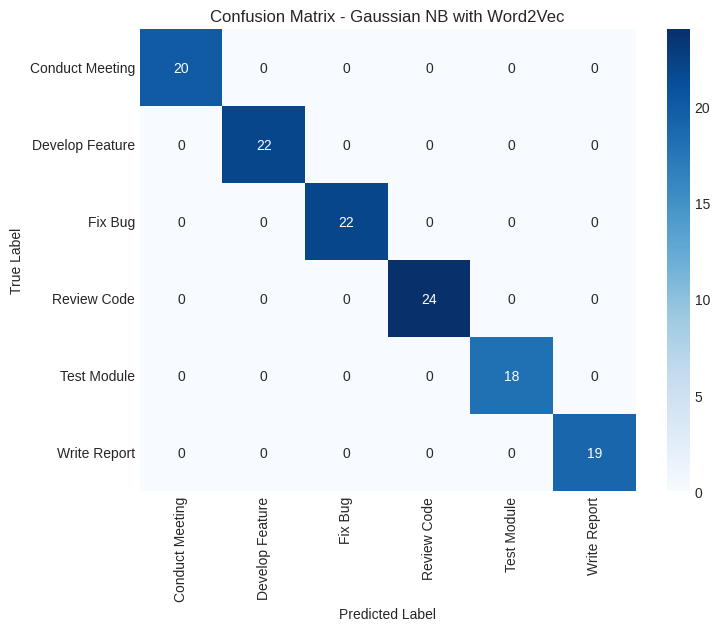

______________________________________________________________________________________________________________________________________________________

 Random Forest with Word2Vec Evaluation 

 > Accuracy: 1.0000

Classification Report:
                 precision    recall  f1-score   support

Conduct Meeting       1.00      1.00      1.00        20
Develop Feature       1.00      1.00      1.00        22
        Fix Bug       1.00      1.00      1.00        22
    Review Code       1.00      1.00      1.00        24
    Test Module       1.00      1.00      1.00        18
   Write Report       1.00      1.00      1.00        19

       accuracy                           1.00       125
      macro avg       1.00      1.00      1.00       125
   weighted avg       1.00      1.00      1.00       125



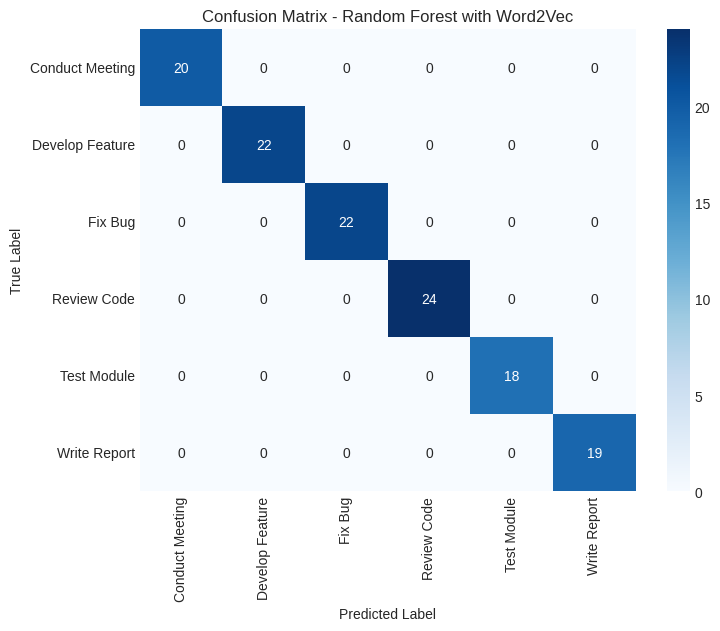


 Logistic Regression with Word2Vec Evaluation 

 > Accuracy: 0.5440

Classification Report:
                 precision    recall  f1-score   support

Conduct Meeting       0.00      0.00      0.00        20
Develop Feature       1.00      1.00      1.00        22
        Fix Bug       1.00      1.00      1.00        22
    Review Code       0.30      1.00      0.46        24
    Test Module       0.00      0.00      0.00        18
   Write Report       0.00      0.00      0.00        19

       accuracy                           0.54       125
      macro avg       0.38      0.50      0.41       125
   weighted avg       0.41      0.54      0.44       125



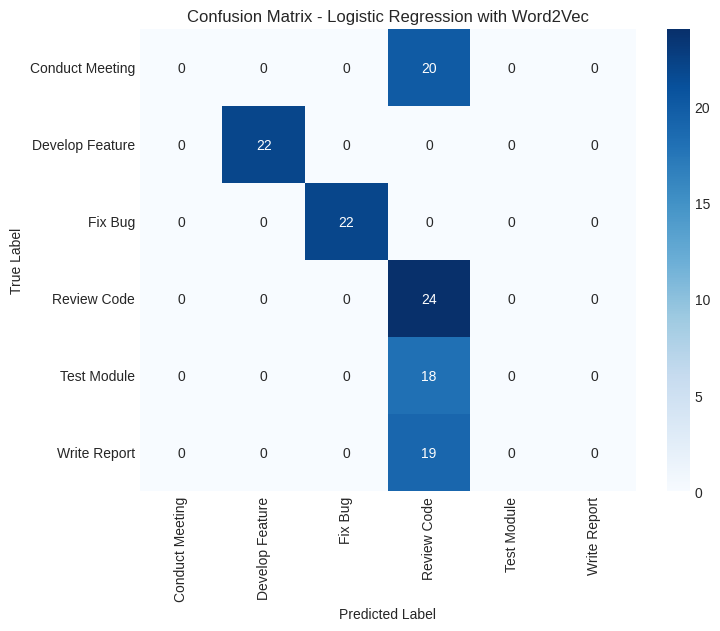

______________________________________________________________________________________________________________________________________________________

 Linear SVM with Word2Vec Evaluation 

 > Accuracy: 1.0000

Classification Report:
                 precision    recall  f1-score   support

Conduct Meeting       1.00      1.00      1.00        20
Develop Feature       1.00      1.00      1.00        22
        Fix Bug       1.00      1.00      1.00        22
    Review Code       1.00      1.00      1.00        24
    Test Module       1.00      1.00      1.00        18
   Write Report       1.00      1.00      1.00        19

       accuracy                           1.00       125
      macro avg       1.00      1.00      1.00       125
   weighted avg       1.00      1.00      1.00       125



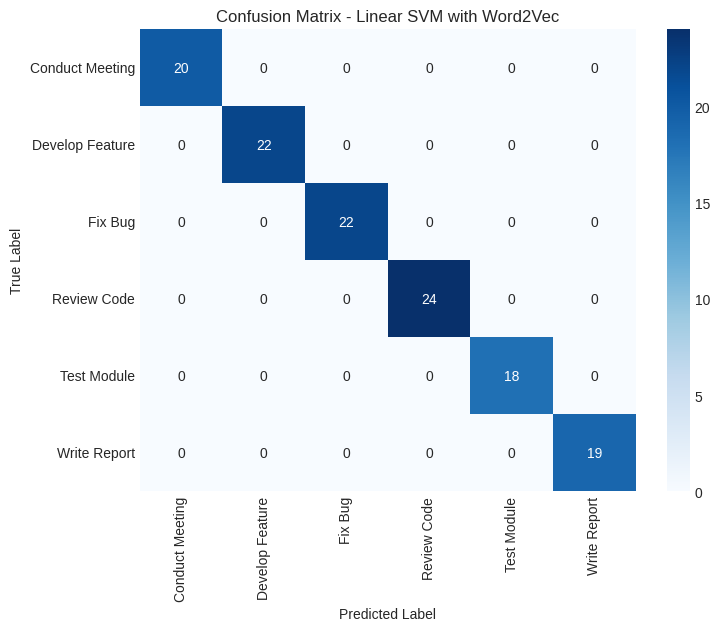

______________________________________________________________________________________________________________________________________________________


In [40]:
# Train and evaluate models using Word2Vec document embeddings

if (
    X_train_w2v is not None
    and X_train_w2v.shape[0] > 0
    and X_train_w2v.shape[1] > 0
):
    # Gaussian Naive Bayes
    nb_w2v_model = GaussianNB()
    nb_w2v_model.fit(X_train_w2v, y_train)
    nbw2v_accuracy, nbw2v_report=evaluate_model(nb_w2v_model, X_test_w2v, y_test, "Gaussian NB with Word2Vec")
    print("___"*50)

    # Random Forest
    # print("\nTraining Random Forest with Word2Vec features...")
    rf_w2v_model = RandomForestClassifier(random_state=42)
    rf_w2v_model.fit(X_train_w2v, y_train)
    rfw2v_accuracy, rfw2v_report=evaluate_model(rf_w2v_model, X_test_w2v, y_test, "Random Forest with Word2Vec")

    # Logistic Regression
    # print("\nTraining Logistic Regression with Word2Vec features...")
    lr_w2v_model = LogisticRegression(max_iter=1000, random_state=42)
    lr_w2v_model.fit(X_train_w2v, y_train)
    lrw2v_accuracy, lrw2v_report=evaluate_model(lr_w2v_model, X_test_w2v, y_test, "Logistic Regression with Word2Vec")
    print("___"*50)

    # Linear SVM
    #print("\nTraining Linear SVM with Word2Vec features...")
    svm_w2v_model =  SVC(kernel='rbf', C=1.0, random_state=42)
    svm_w2v_model.fit(X_train_w2v, y_train)
    svmw2v_accuracy, svmw2v_report= evaluate_model(svm_w2v_model, X_test_w2v, y_test, "Linear SVM with Word2Vec")
    print("___"*50)

else:
    print("Skipping Word2Vec-based model training as Word2Vec features are not available.")


In [41]:
w2v_comparison_data = {
    "Model": [
        "Gaussian NB (Word2Vec)",
        "Random Forest (Word2Vec)",
        "Logistic Regression (Word2Vec)",
        "Linear SVM (Word2Vec)"
    ],
    "Accuracy": [
        nbw2v_accuracy,
        rfw2v_accuracy,
        lrw2v_accuracy,
        svmw2v_accuracy
    ],
    "Precision (Weighted)": [
        nbw2v_report["weighted avg"]["precision"],
        rfw2v_report["weighted avg"]["precision"],
        lrw2v_report["weighted avg"]["precision"],
        svmw2v_report["weighted avg"]["precision"]
    ],
    "Recall (Weighted)": [
        nbw2v_report["weighted avg"]["recall"],
        rfw2v_report["weighted avg"]["recall"],
        lrw2v_report["weighted avg"]["recall"],
        svmw2v_report["weighted avg"]["recall"]
    ],
    "F1-score (Weighted)": [
        nbw2v_report["weighted avg"]["f1-score"],
        rfw2v_report["weighted avg"]["f1-score"],
        lrw2v_report["weighted avg"]["f1-score"],
        svmw2v_report["weighted avg"]["f1-score"]
    ]
}

w2v_results_df = pd.DataFrame(w2v_comparison_data)

print("\n📊 Model comparison summary for Word2Vec-based classification models:\n")
try:
    display(w2v_results_df.round(4))
except:
    print(w2v_results_df.round(4))



📊 Model comparison summary for Word2Vec-based classification models:



,Model,Accuracy,Precision (Weighted),Recall (Weighted),F1-score (Weighted)
0,Gaussian NB (Word2Vec),1.000,1.0000,1.000,1.0000
1,Random Forest (Word2Vec),1.000,1.0000,1.000,1.0000
2,Logistic Regression (Word2Vec),0.544,0.4089,0.544,0.4398
3,Linear SVM (Word2Vec),1.000,1.0000,1.000,1.0000


**Comparison between TF-IDF and Word2Vec model results:**

* Overall Accuracy:

    TF-IDF based models (Naive Bayes, Random Forest, Logistic Regression, Linear SVM) all achieved perfect accuracy (1.0), indicating excellent classification on the test set. In contrast, Word2Vec models showed mixed results, with Logistic Regression performing significantly worse (~0.54 accuracy), while others (Gaussian NB, Random Forest, Linear SVM) matched the perfect scores.

* Model Robustness:

    TF-IDF features provided consistent high performance across all classifiers, suggesting these sparse, frequency-based vectors capture task-specific keywords effectively. Word2Vec embeddings, which capture semantic relationships, may need more tuning or larger data to perform reliably, as seen with Logistic Regression’s drop in performance.

* Potential Overfitting / Data Leakage:

    Perfect accuracy in both TF-IDF and Word2Vec (except Logistic Regression) hints at potential data leakage or very similar train/test splits, warranting thorough validation through cross-validation or stricter splitting methods.

* Practical Implications:

    TF-IDF is a strong baseline for text classification tasks with small to medium datasets. Word2Vec embeddings could improve with more data, fine-tuning, or combined with other features, but may require additional validation to ensure generalization.

------------------------------------
---------------------------------------

In [42]:
from datetime import datetime
import time

## **Priority Prediction Model**

* This classification model predicts a task’s priority level using its description and type as inputs.

* The task description is transformed into numerical features through TF-IDF vectorization, and the task type is encoded numerically.

* The model outputs the predicted priority category (e.g., High, Medium, Low) to help prioritize tasks effectively.

In [43]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
pd.set_option('display.float_format', '{:.2f}'.format)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")

print("Libraries imported and NLTK resources checked.")

Libraries imported and NLTK resources checked.


In [44]:
# --- Utility Functions (from combined script for reusability) ---
lemmatizer_global = WordNetLemmatizer()
stop_words_global = set(stopwords.words('english'))

In [45]:
def preprocess_nlp_text_utility(text, lemmatizer=lemmatizer_global, stop_words=stop_words_global):
    if pd.isna(text) or not isinstance(text, str): return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.strip()])

In [46]:
def evaluate_classification_model_utility(model, X_test, y_test, model_name="Model", feature_type=""):
    full_model_name = f"{model_name} ({feature_type})" if feature_type else model_name
    print(f"\n Model Evaluation: {full_model_name} ")
    try: y_pred = model.predict(X_test)
    except NotFittedError:
        print(f"Model {full_model_name} not fitted. Skipping evaluation.")
        return None, None
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}\n")
    labels = sorted(list(set(y_test) | set(y_pred)))
    print("Classification Report:"); print(classification_report(y_test, y_pred, labels=labels, zero_division=0))
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(max(6, len(labels)*0.7), max(4, len(labels)*0.5)))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
    plt.title(f'CM - {full_model_name}'); plt.xlabel('Predicted'); plt.ylabel('True'); plt.tight_layout(); plt.show()
    return accuracy, classification_report(y_test, y_pred, labels=labels, zero_division=0, output_dict=True)


In [47]:
# Load the dataset (assuming it's been processed by Week 1 equivalent steps)
try:
    # Try loading the output of Week 1 if you saved it
    # df = pd.read_csv('cleaned_ai_powered_task_management_dataset_week1.csv')
    # For standalone Week 3, load original and do minimal required processing:
    df = pd.read_csv('ai_powered_task_management_dataset.csv')
    print("Dataset loaded successfully")

    # Minimal Week 1 cleaning needed for Week 3 features
    df['deadline'] = pd.to_datetime(df['deadline'])
    df['dependencies'] = df['dependencies'].fillna("None") # For potential feature use
    df['actual_time_hrs'] = df['actual_time_hrs'].clip(lower=0) # Important for consistency
    # Ensure 'processed_description' exists
    if 'processed_description' not in df.columns:
        print()
        print("Generating 'processed_description' column...")
        df['processed_description'] = df['task_description'].astype(str).apply(preprocess_nlp_text_utility)

    # Ensure 'priority' is category
    df['priority'] = df['priority'].astype('category')

    # Define 'task_type' (as done in Week 2) as it's used as a feature for priority
    def extract_task_type_minimal(description):
        description_lower = str(description).lower()
        if 'write report' in description_lower: return 'Write Report'
        if 'review code' in description_lower: return 'Review Code'
        if 'test module' in description_lower: return 'Test Module'
        if 'develop feature' in description_lower: return 'Develop Feature'
        if 'conduct meeting' in description_lower: return 'Conduct Meeting'
        if 'fix bug' in description_lower: return 'Fix Bug'
        if description_lower.startswith('write'): return 'Write Report'
        if description_lower.startswith('review'): return 'Review Code'
        if description_lower.startswith('test'): return 'Test Module'
        if description_lower.startswith('develop'): return 'Develop Feature'
        if description_lower.startswith('conduct'): return 'Conduct Meeting'
        if description_lower.startswith('fix'): return 'Fix Bug'
        return 'Other'
    df['task_type'] = df['task_description'].astype(str).apply(extract_task_type_minimal)
    # Convert to category AFTER extracting types, but BEFORE filling NaNs
    df['task_type'] = df['task_type'].astype('category')

    # Fill NaNs in key numerical columns that might be used
    num_cols_to_fill = ['estimated_time_hrs', 'urgency', 'user_behavior_score',
                        'user_avg_daily_hours', 'user_current_workload_hrs']
    for col in num_cols_to_fill:
        if col in df.columns and df[col].isnull().any():
            df[col] = df[col].fillna(df[col].median())

    # --- Fix: Add 'Unknown' to categories before filling NaNs ---
    # DEFINE categorical_features_for_priority HERE
    categorical_features_for_priority = ['task_type']

    task_type_col = categorical_features_for_priority[0] # Which is 'task_type'
    if df[task_type_col].isnull().any():
        print(f"Handling NaNs in '{task_type_col}' by adding 'Unknown' category...")
        # Get current categories
        current_categories = list(df[task_type_col].cat.categories)
        # Add 'Unknown' if not already present
        if 'Unknown' not in current_categories:
            df[task_type_col] = df[task_type_col].cat.add_categories(['Unknown'])
        # Now fill NaNs
        df[task_type_col] = df[task_type_col].fillna("Unknown")
        df.dependencies = df.dependencies.fillna("None")
    # --- End Fix ---


    #print("Minimal data prep for Week 3 completed.")

except FileNotFoundError:
    print("Error: 'ai_powered_task_management_dataset.csv' not found. Cannot proceed.")
    df = pd.DataFrame()

if df.empty:
    print("DataFrame is empty. Exiting Week 3 script.")
    exit()

# print("\n--- DataFrame Head (Start of Week 3 focus) ---")
print(df.info())
print("--"*50)
df.head()

Dataset loaded successfully

Generating 'processed_description' column...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   user_id                    500 non-null    object        
 1   task_id                    500 non-null    object        
 2   task_description           500 non-null    object        
 3   priority                   500 non-null    category      
 4   deadline                   500 non-null    datetime64[ns]
 5   estimated_time_hrs         500 non-null    float64       
 6   actual_time_hrs            500 non-null    float64       
 7   user_avg_daily_hours       500 non-null    float64       
 8   user_current_workload_hrs  500 non-null    float64       
 9   user_behavior_score        500 non-null    float64       
 10  task_assignment_score      500 non-null    float64       
 1

,user_id,task_id,task_description,priority,deadline,estimated_time_hrs,actual_time_hrs,user_avg_daily_hours,user_current_workload_hrs,user_behavior_score,task_assignment_score,dependencies,urgency,delay_days,completion_time_hrs,completion_efficiency,processed_description,task_type
0,U052,T0000,Write report,Medium,2025-06-08,8.60,11.10,9.10,9.20,0.12,0.91,T0020,0.20,5,16.10,0.53,write report,Write Report
1,U093,T0001,Review code,High,2025-05-26,8.60,11.00,5.40,7.00,0.80,0.64,T0020,0.39,3,14.00,0.61,review code,Review Code
2,U015,T0002,Test module,Low,2025-06-02,9.60,9.20,6.30,1.60,0.62,0.95,T0030,0.05,0,9.20,1.04,test module,Test Module
3,U072,T0003,Develop feature,High,2025-05-19,2.40,4.70,6.80,8.50,0.84,0.88,T0010,0.40,0,4.70,0.51,develop feature,Develop Feature
4,U061,T0004,Review code,Medium,2025-05-31,6.60,6.50,6.90,6.10,0.10,0.58,None,0.51,1,7.50,0.88,review code,Review Code


In [48]:
# Feature Engineering for Priority Prediction
# Time-based features from `deadline`
current_date_for_calc = pd.Timestamp('today').normalize() # Use a fixed reference for calculations
df['days_until_deadline'] = (df['deadline'] - current_date_for_calc).dt.days
df['deadline_weekday'] = df['deadline'].dt.weekday

y_priority = df['priority']

numerical_features_for_priority = ['estimated_time_hrs', 'urgency', 'user_behavior_score', 'days_until_deadline', 'deadline_weekday']
text_feature_for_priority = 'processed_description'
categorical_features_for_priority = ['task_type'] # Ensure this is defined here

for col in numerical_features_for_priority:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median()) # Impute with median

df[text_feature_for_priority] = df[text_feature_for_priority].fillna("") # Fill text NaNs with empty string

# --- FIX START: Add 'Unknown' to categorical feature categories before filling NaN ---
task_type_col = categorical_features_for_priority[0] # Which is 'task_type'
if task_type_col in df.columns and df[task_type_col].dtype.name == 'category':
     if 'Unknown' not in df[task_type_col].cat.categories:
         # print(f"Adding 'Unknown' category to '{task_type_col}'...")
         df[task_type_col] = df[task_type_col].cat.add_categories(['Unknown'])
# --- FIX END ---

# Now fill NaNs with 'Unknown'
df[categorical_features_for_priority[0]] = df[categorical_features_for_priority[0]].fillna("Unknown")

X_priority_df = df[[text_feature_for_priority] + numerical_features_for_priority + categorical_features_for_priority]

print(f"Distribution of Target variable :'priority'\n{y_priority.value_counts(normalize=True)}")

Distribution of Target variable :'priority'
priority
Medium   0.34
High     0.34
Low      0.32
Name: proportion, dtype: float64


The dataset is well-balanced across the three priority classes, with proportions close to one-third each (Medium: 34%, High: 34%, Low: 32%).

The code above is setting up and training a Priority Prediction Model using a pipeline that preprocesses features and then fits a Random Forest classifier.

> Uses a ColumnTransformer to apply:

* TF-IDF vectorization on the task description text (text_feature_for_priority)

* Standard scaling on numerical features (numerical_features_for_priority)

* One-hot encoding on categorical features (categorical_features_for_priority).


 Model Evaluation: Priority Prediction Model using Random Forest 
Accuracy: 0.3520

Classification Report:
              precision    recall  f1-score   support

        High       0.39      0.48      0.43        42
         Low       0.27      0.20      0.23        41
      Medium       0.36      0.38      0.37        42

    accuracy                           0.35       125
   macro avg       0.34      0.35      0.34       125
weighted avg       0.34      0.35      0.34       125



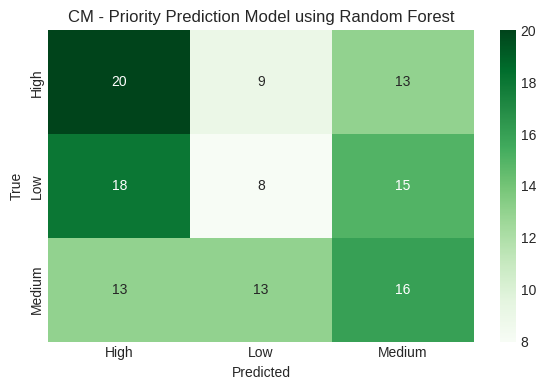

In [49]:
preprocessor_priority_model = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=1000, ngram_range=(1,1)), text_feature_for_priority),
        ('num', StandardScaler(), numerical_features_for_priority),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), categorical_features_for_priority)
    ],
    remainder='drop' # Should not have any remainders based on X_priority_df selection
)

priority_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_priority_model),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced'))
])

priority_model_runnable = False
if len(y_priority.unique()) >= 2 and not X_priority_df.empty:
    X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(
        X_priority_df, y_priority, test_size=0.25, random_state=42, stratify=y_priority
    )
    priority_model_runnable = True
    # print(f"\nPriority Prediction Model using RandomForest ...")
    start_train_time = time.time()
    priority_model_pipeline.fit(X_p_train, y_p_train)
    # print(f"Training completed in {time.time() - start_train_time:.2f} seconds.")
    evaluate_classification_model_utility(priority_model_pipeline, X_p_test, y_p_test,
                                          "Priority Prediction Model using Random Forest")
else:
    print("Skipping Priority Prediction Model training due to insufficient distinct classes or empty feature set.")

    print("\n--- Workload Balancing Heuristic ---")


**Observations**

* The overall accuracy is quite low at 35.2%, indicating the model struggles to correctly predict the priority labels.

* Precision and recall scores are modest across all classes (High, Medium, Low), with none exceeding 0.48, showing the model has limited ability to distinguish between priority levels.

* The High priority class performs slightly better than Low and Medium, but all classes have relatively balanced support.

* The model may benefit from further tuning, additional features, or more advanced algorithms to improve predictive performance.

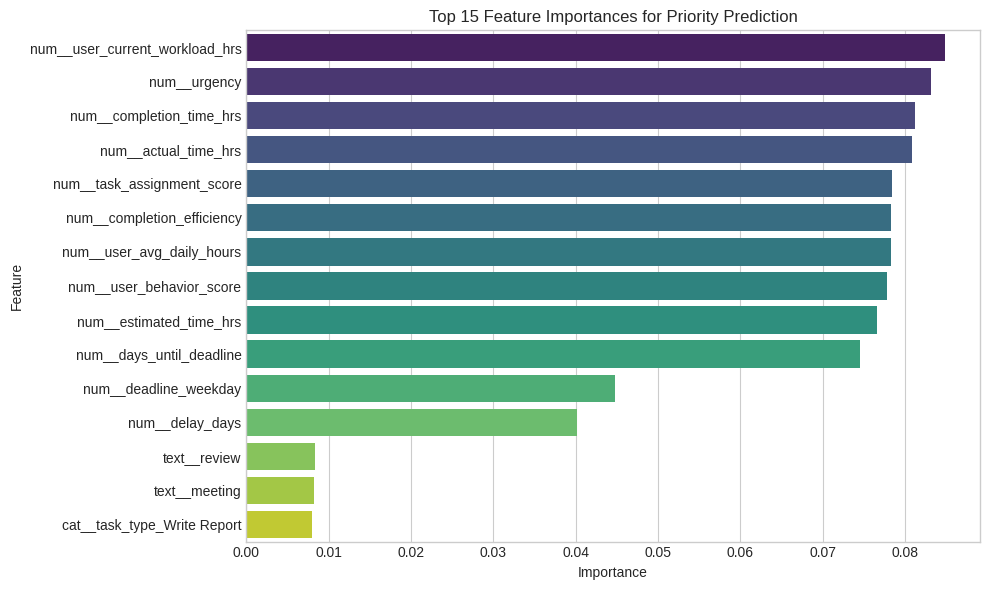

                          Feature  Importance
0  num__user_current_workload_hrs        0.08
1                    num__urgency        0.08
2        num__completion_time_hrs        0.08
3            num__actual_time_hrs        0.08
4      num__task_assignment_score        0.08
5      num__completion_efficiency        0.08
6       num__user_avg_daily_hours        0.08
7        num__user_behavior_score        0.08
8         num__estimated_time_hrs        0.08
9        num__days_until_deadline        0.07


In [50]:
# Revised model for priority prediction
text_feature_for_priority = 'processed_description'
numerical_features_for_priority = df.select_dtypes(include=['number']).columns.tolist()
categorical_features_for_priority = ['task_type']

# Assuming 'df' already exists and is cleaned
X_priority_df = df[[text_feature_for_priority] + numerical_features_for_priority + categorical_features_for_priority]
y_priority = df['priority']

# Preprocessing and model pipeline
preprocessor_priority_model = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=1000, ngram_range=(1, 1)), text_feature_for_priority),
        ('num', StandardScaler(), numerical_features_for_priority),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), categorical_features_for_priority)
    ]
)

priority_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_priority_model),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced'))
])

# Train/test split
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(
    X_priority_df, y_priority, test_size=0.25, random_state=42, stratify=y_priority
)

# Train the model
priority_model_pipeline.fit(X_p_train, y_p_train)

# Feature importances
feature_names = (priority_model_pipeline.named_steps['preprocessor'].get_feature_names_out())
importances = priority_model_pipeline.named_steps['classifier'].feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature':  feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances for Priority Prediction')
plt.tight_layout()
plt.show()

# Top 10 features
print(feature_importance_df.head(10).reset_index(drop=True))

* All features listed have very similar importance values (~0.07–0.08), suggesting the model considers them nearly equally relevant.

* The top contributing features include:

> * User workload, urgency, and completion time, which intuitively affect task priority.
> * User behavior and efficiency metrics (e.g., completion_efficiency, user_behavior_score) are also strong indicators.

✅ Implication:
This even spread indicates that no single feature dominates; instead, priority prediction likely benefits from a balanced mix of user- and task-related metrics.

In [51]:
# Mock user profiles (aggregate from dataset for demonstration)
# This code snippet creates mock user profiles by aggregating data based on user_id from the original dataset
# It calculates the average daily hours (avg_daily_hours), current workload hours (current_workload_hrs),
# and behavior score (behavior_score) for each user by taking the mean of the respective columns.

mock_user_profiles = df.groupby('user_id').agg(
    avg_daily_hours=('user_avg_daily_hours', 'mean'),
    current_workload_hrs=('user_current_workload_hrs', 'mean'),
    behavior_score=('user_behavior_score', 'mean')).reset_index()


In [52]:
# Robust NaN filling for mock profiles
median_avg_daily = mock_user_profiles['avg_daily_hours'].median() if not mock_user_profiles['avg_daily_hours'].isnull().all() else 8.0
mock_user_profiles['avg_daily_hours'] = mock_user_profiles['avg_daily_hours'].fillna(median_avg_daily)

median_current_workload = mock_user_profiles['current_workload_hrs'].median() if not mock_user_profiles['current_workload_hrs'].isnull().all() else median_avg_daily / 2
mock_user_profiles['current_workload_hrs'] = mock_user_profiles['current_workload_hrs'].fillna(median_current_workload)
# Robust NaN filling for mock profiles
median_avg_daily = mock_user_profiles['avg_daily_hours'].median() if not mock_user_profiles['avg_daily_hours'].isnull().all() else 8.0
mock_user_profiles['avg_daily_hours'] = mock_user_profiles['avg_daily_hours'].fillna(median_avg_daily)

median_current_workload = mock_user_profiles['current_workload_hrs'].median() if not mock_user_profiles['current_workload_hrs'].isnull().all() else median_avg_daily / 2
mock_user_profiles['current_workload_hrs'] = mock_user_profiles['current_workload_hrs'].fillna(median_current_workload)

median_behavior_score = mock_user_profiles['behavior_score'].median() if not mock_user_profiles['behavior_score'].isnull().all() else 0.5
mock_user_profiles['behavior_score'] = mock_user_profiles['behavior_score'].fillna(median_behavior_score)

* The code above handles missing values (NaNs) in the mock_user_profiles DataFrame by filling them with robust imputed values.

* It calculates the median for columns like avg_daily_hours, current_workload_hrs, and behavior_score, and uses these medians to replace NaNs unless the column is entirely null, in which case a default value is used.

* For each column, it ensures that missing values are filled with a meaningful statistic (median) to avoid introducing biases or errors in downstream tasks.

In [53]:
def assign_task_heuristic(new_task_estimated_hrs, users_df, workload_buffer=1.2):
    if users_df.empty:
        print("No user profiles available for assignment.")
        return None

    # Function to calculate the score for each user
    def calculate_user_score(user):
        current_workload = user.get('current_workload_hrs', 0)
        avg_daily = user.get('avg_daily_hours', 8.0)
        behavior = user.get('behavior_score', 0.5)

        # Projected workload after assigning the new task
        projected_workload = current_workload + new_task_estimated_hrs

        # Buffered capacity (considering overload buffer)
        buffered_capacity = avg_daily * workload_buffer
        overload_penalty = max(0, projected_workload - buffered_capacity)

        # Behavior bonus (higher behavior is better)
        behavior_bonus = behavior

        # Final score (lower score is better: prioritizing under capacity and good behavior)
        score = overload_penalty - behavior_bonus

        return {
            'user_id': user['user_id'],
            'score': score,
            'projected_workload': projected_workload,
            'buffered_capacity': buffered_capacity
        }

    # Generate the scores for all users
    candidate_users = [calculate_user_score(user) for _, user in users_df.iterrows()]

    if not candidate_users:
        print("No candidates generated.")
        return None

    # Sort candidates by score (ascending order)
    best_candidate = min(candidate_users, key=lambda x: x['score'])

    # Output top candidate info
    print(f"Top candidate: User {best_candidate['user_id']} (Score: {best_candidate['score']:.2f}, "
          f"Proj. Load: {best_candidate['projected_workload']:.2f} / Cap: {best_candidate['buffered_capacity']:.2f})")

    return best_candidate['user_id']



This code defines a task assignment heuristic that assigns a task to a user based on their current workload, average daily hours, and behavior score. The heuristic evaluates which user is best suited to take on a new task based on the following criteria:

* Workload Buffer: A workload_buffer (default of 1.2, or 120% of daily capacity) is applied to account for task overloads. If a user is expected to exceed this buffer after adding the new task, they are penalized.

* A higher behavior score is considered a "bonus" in the user's favor, as users with better scores are preferred for task assignments.

* A score is assigned to each user based on how much they would be overloaded and their behavior score. The goal is to assign tasks to users who are under capacity and exhibit good behavior.

* The user with the lowest score (indicating the least overload and highest behavior) is chosen as the best candidate for the new task.

In [54]:
# Demonstrate heuristic
sample_new_task_hours = 4.0
print(f"Demonstrating heuristic for a new task of {sample_new_task_hours} hours:")
suggested_user = assign_task_heuristic(sample_new_task_hours, mock_user_profiles)
if suggested_user:
    print(f"--> Heuristically Suggested User: {suggested_user}")
else:
    print("--> No user suggested by heuristic.")

Demonstrating heuristic for a new task of 4.0 hours:
Top candidate: User U074 (Score: -0.93, Proj. Load: 6.20 / Cap: 10.20)
--> Heuristically Suggested User: U074


### **Model Pipeline for Priority Prediction**

This code aims to prepare the dataset for training a Priority Prediction Model by handling both the features and target variables, while ensuring that the data is appropriately preprocessed and split for model training.

* Feature and Target Definition:

> * Numerical features are selected (estimated_time_hrs, urgency, user_behavior_score, user_avg_daily_hours, user_current_workload_hrs).
> * Categorical features are specified (task_type), and a text feature (processed_description) is also considered for TF-IDF vectorization.

* Filter Low-Frequency Priority Classes:

Low-frequency classes in the priority target variable (with fewer than 2 samples) are removed to ensure stratification during train-test splitting.

After filtering, it checks if there are enough classes left for training (priority_model_runnable is set to True).

* Preprocessing

> * Numerical features are standardized using StandardScaler.
* Categorical features are one-hot encoded using OneHotEncoder.
* If there is a text feature, it's processed using TfidfVectorizer to convert text data into numerical form (with optional n-gram settings).

* The preprocessor is defined as a ColumnTransformer, which ensures that each feature type is preprocessed accordingly.

* Pipeline Definition:

The pipeline is created with the preprocessor, followed by a placeholder classifier (RandomForestClassifier).The pipeline includes all preprocessing steps (numerical, categorical, and text) and then applies the classifier to the processed data.


In [55]:
# Prepare features for priority prediction

numerical_features_for_priority = ['estimated_time_hrs', 'urgency', 'user_behavior_score',
                                   'user_avg_daily_hours', 'user_current_workload_hrs'] # Add relevant ones
# Categorical features - make sure 'task_type' is included and handled as category
categorical_features_for_priority = ['task_type']
# Text feature - the processed description for TF-IDF
text_feature_for_priority = 'processed_description'

# Ensure all listed columns actually exist in the dataframe
numerical_features_for_priority = [col for col in numerical_features_for_priority if col in df.columns]
categorical_features_for_priority = [col for col in categorical_features_for_priority if col in df.columns]
if text_feature_for_priority not in df.columns:
    print(f"Warning: Text feature '{text_feature_for_priority}' not found in df. Skipping.")
    text_feature_for_priority = None

features_for_priority = numerical_features_for_priority + categorical_features_for_priority
if text_feature_for_priority:
     features_for_priority.append(text_feature_for_priority)

if not features_for_priority:
    print("Error: No features selected for priority prediction. Cannot proceed.")
    priority_model_runnable = False
else:
    X_p = df[features_for_priority]
    y_p = df['priority']

    # Handle low-frequency classes for stratification in priority prediction
    p_val_counts = y_p.value_counts()
    p_to_remove = p_val_counts[p_val_counts < 2].index
    if not p_to_remove.empty:
        print(f"\nRemoving priority classes with < 2 samples for stratification: {p_to_remove.tolist()}")
        df_p_filtered = df[~df['priority'].isin(p_to_remove)]
        X_p = df_p_filtered[features_for_priority]
        y_p = df_p_filtered['priority']
        print(f"New shape of X_p: {X_p.shape}, y_p: {y_p.shape}")

    # Check if there are enough classes and data points after filtering
    priority_model_runnable = False
    if len(y_p.unique()) >= 2 and not X_p.empty:
        print("\nSplitting data for Priority Prediction Model...")

        # Define preprocessor for priority model
        # Use OneHotEncoder for categorical features, StandardScaler for numerical
        preprocessor_priority = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numerical_features_for_priority),
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_for_priority)
                 # Text feature (TF-IDF) will be handled in the pipeline after splitting
            ],
            remainder='passthrough' # Keep other columns (like text) for now
        )

        # Split the data *before* applying TF-IDF to text column
        # Need to handle the text column separately in the pipeline steps
        X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(
            X_p, y_p, test_size=0.25, random_state=42, stratify=y_p
        )
        priority_model_runnable = True
        print(f"Training set size (Priority): {X_p_train.shape[0]}")
        print(f"Test set size (Priority): {X_p_test.shape[0]}\n")
        print(f"Training target distribution (Priority):\n{y_p_train.value_counts(normalize=True)}\n")
        print(f"Test target distribution (Priority):\n{y_p_test.value_counts(normalize=True)}")

        # Define the priority model pipeline
        # This pipeline needs to handle both preprocessed numerical/categorical features AND TF-IDF text features
        # This requires a slightly more complex pipeline structure, potentially FeatureUnion
        # or handling text features inside the pipeline with a separate TF-IDF step.
        # For simplicity in fixing the NameError and matching the tuning block,
        # let's assume the priority_model_pipeline is defined using these features
        # including a TF-IDF step for the text column.
        # A basic example pipeline structure that incorporates text:
        # You'd need a way to apply TF-IDF to the text column *within* the pipeline after splitting.
        # A more robust way is to use a ColumnTransformer that applies TF-IDF to the text column
        # along with other numerical/categorical transformations.

        # Revised preprocessor including TF-IDF for the text column
        if text_feature_for_priority:
             preprocessor_priority = ColumnTransformer(
                 transformers=[
                     ('num', StandardScaler(), numerical_features_for_priority),
                     ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_for_priority),
                     ('text', TfidfVectorizer(max_features=1000, ngram_range=(1,2)), text_feature_for_priority) # Add TF-IDF here
                 ],
                 remainder='drop' # Drop columns not specified
             )
        else:
             # If no text feature, use the simpler preprocessor
             preprocessor_priority = ColumnTransformer(
                 transformers=[
                     ('num', StandardScaler(), numerical_features_for_priority),
                     ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_for_priority)
                 ],
                 remainder='drop'
             )


        # Define the full pipeline including preprocessing and classifier
        # The classifier should be the one you intend to tune (RandomForestClassifier as in the tuning block)
        priority_model_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor_priority),
            ('classifier', RandomForestClassifier(random_state=42)) # Placeholder classifier
        ])

        print("\nPriority Prediction Pipeline defined.")


    else:
        print("Skipping Priority Model Training/Tuning: Insufficient data/classes after filtering.")


Splitting data for Priority Prediction Model...
Training set size (Priority): 375
Test set size (Priority): 125

Training target distribution (Priority):
priority
Medium   0.34
High     0.34
Low      0.32
Name: proportion, dtype: float64

Test target distribution (Priority):
priority
High     0.34
Medium   0.34
Low      0.33
Name: proportion, dtype: float64

Priority Prediction Pipeline defined.


In [56]:
import joblib

In [57]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 130)
pd.set_option('display.float_format', '{:.2f}'.format)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis") # New palette for final visuals

print("Libraries imported and NLTK resources checked.")

Libraries imported and NLTK resources checked.


In [58]:
lemmatizer_global = WordNetLemmatizer()
stop_words_global = set(stopwords.words('english'))

def preprocess_nlp_text_utility(text, lemmatizer=lemmatizer_global, stop_words=stop_words_global):
    if pd.isna(text) or not isinstance(text, str): return ""
    text = text.lower(); text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.strip()])

def evaluate_final_model_utility(model, X_test, y_test, model_name="Model", feature_type=""):
    full_model_name = f" {model_name} + {feature_type}" if feature_type else f" {model_name}"
    print(f"\nEvaluation of {full_model_name} Model for Task Type Classification")
    try: y_pred = model.predict(X_test)
    except NotFittedError:
        print(f"Model {full_model_name} not fitted. Skipping evaluation.")
        return None, None, None
    accuracy = accuracy_score(y_test, y_pred)
    print(f"  > Accuracy: {accuracy:.4f}")
    labels = sorted(list(set(y_test) | set(y_pred)))
    report_str = classification_report(y_test, y_pred, labels=labels, zero_division=0)
    report_dict = classification_report(y_test, y_pred, labels=labels, zero_division=0, output_dict=True)
    print("--"*40)
    print("Classification Report:\n", report_str)
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(max(6, len(labels)*0.7), max(4, len(labels)*0.5)))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels)
    plt.title(f'CM - {full_model_name}'); plt.xlabel('Predicted'); plt.ylabel('True'); plt.tight_layout(); plt.show()
    return accuracy, report_dict, cm

In [59]:
try:
    df = pd.read_csv('ai_powered_task_management_dataset.csv')
    print("Original dataset loaded for Week 4 finalization.")

    # Week 1 style cleaning
    df['deadline'] = pd.to_datetime(df['deadline'])
    df['dependencies'] = df['dependencies'].replace('None', np.nan)
    df['actual_time_hrs'] = df['actual_time_hrs'].clip(lower=0)
    df['processed_description'] = df['task_description'].astype(str).apply(preprocess_nlp_text_utility)
    df['priority'] = df['priority'].astype('category')

    # Week 2 style 'task_type'
    def extract_task_type_final(description):
        desc_lower = str(description).lower()
        if any(kw in desc_lower for kw in ['write report', 'report writing']): return 'Write Report'
        if any(kw in desc_lower for kw in ['review code', 'code review']): return 'Review Code'
        if any(kw in desc_lower for kw in ['test module', 'module testing']): return 'Test Module'
        if any(kw in desc_lower for kw in ['develop feature', 'feature development']): return 'Develop Feature'
        if any(kw in desc_lower for kw in ['conduct meeting', 'meeting facilitation']): return 'Conduct Meeting'
        if any(kw in desc_lower for kw in ['fix bug', 'bug fixing']): return 'Fix Bug'
        # Fallbacks
        if desc_lower.startswith('write'): return 'Write Report'
        if desc_lower.startswith('review'): return 'Review Code'
        if desc_lower.startswith('test'): return 'Test Module'
        if desc_lower.startswith('develop'): return 'Develop Feature'
        if desc_lower.startswith('conduct'): return 'Conduct Meeting'
        if desc_lower.startswith('fix'): return 'Fix Bug'
        return 'Other'
    df['task_type'] = df['task_description'].astype(str).apply(extract_task_type_final)
    df['task_type'] = df['task_type'].astype('category')

    # Week 3 style features for priority
    current_date_ref = pd.Timestamp('today').normalize()
    df['days_until_deadline'] = (df['deadline'] - current_date_ref).dt.days
    df['deadline_weekday'] = df['deadline'].dt.weekday

    # Fill NaNs in key numerical columns (simplified imputation for brevity)
    num_cols_to_impute = ['estimated_time_hrs', 'urgency', 'user_behavior_score',
                          'user_avg_daily_hours', 'user_current_workload_hrs',
                          'days_until_deadline', 'deadline_weekday'] # Ensure these exist
    for col in num_cols_to_impute:
        if col in df.columns: # Check if column exists (e.g. if deadline features were created)
             if df[col].isnull().any():
                df[col] = df[col].fillna(df[col].median())
        else: # If a feature column isn't there (e.g. due to missing 'deadline' from source)
            if col in ['days_until_deadline', 'deadline_weekday']: df[col] = 0 # Default
            else: df[col] = df[df.select_dtypes(include=np.number).columns].median().median() # Generic median


    print("Data preparation for Week 4 completed.")
except FileNotFoundError:
    print("Error: 'ai_powered_task_management_dataset.csv' not found. Cannot proceed.")
    df = pd.DataFrame()

if df.empty:
    print("DataFrame is empty. Exiting Week 4 script.")
    exit()

# Storage for final results
final_model_performances = {}
final_models = {}


Original dataset loaded for Week 4 finalization.
Data preparation for Week 4 completed.


# **Model Development and Performance Evaluation Post-Hyperparameter Tuning**

## **Task Type Classification Model ( LinearSVC & TF-IDF)**

> * Model Used: LinearSVC (Support Vector Classifier) with TF-IDF features
> * Task: Classifying tasks into specific categories
> * Goal: Automatically identify task types based on text descriptions


--- Task Classification Model ---
Training final Task Type model with best parameters...

Evaluation of  LinearSVC + TF-IDF (Task Type) Model for Task Type Classification
  > Accuracy: 1.0000
--------------------------------------------------------------------------------
Classification Report:
                  precision    recall  f1-score   support

Conduct Meeting       1.00      1.00      1.00        20
Develop Feature       1.00      1.00      1.00        22
        Fix Bug       1.00      1.00      1.00        22
    Review Code       1.00      1.00      1.00        24
    Test Module       1.00      1.00      1.00        18
   Write Report       1.00      1.00      1.00        19

       accuracy                           1.00       125
      macro avg       1.00      1.00      1.00       125
   weighted avg       1.00      1.00      1.00       125



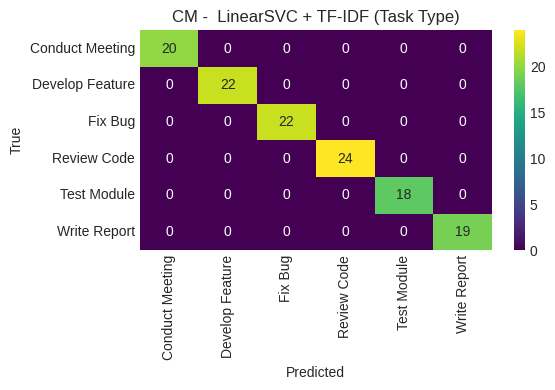

In [60]:
print("\n--- Task Classification Model ---")
X_tt_final = df['processed_description']
y_tt_final = df['task_type']

# Stratification handling
tt_val_counts_final = y_tt_final.value_counts()
tt_remove_final = tt_val_counts_final[tt_val_counts_final < 2].index
if not tt_remove_final.empty:
    df_tt_filt_final = df[~df['task_type'].isin(tt_remove_final)]
    X_tt_final = df_tt_filt_final['processed_description']
    y_tt_final = df_tt_filt_final['task_type']

final_task_type_model = None
if len(y_tt_final.unique()) >= 2 and not X_tt_final.empty:
    X_tt_train_final, X_tt_test_final, y_tt_train_final, y_tt_test_final = train_test_split(
        X_tt_final, y_tt_final, test_size=0.25, random_state=42, stratify=y_tt_final
    )
    # Best params from a hypothetical Week 3 GridSearchCV (replace with actuals if you ran it fully)
    # Example: {'tfidf__max_features': 5000, 'tfidf__min_df': 2, 'svm__C': 1.0}
    best_tfidf_max_features_tt = 5000
    best_tfidf_min_df_tt = 2
    best_svm_C_tt = 1.0

    final_task_type_model_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1,2),
                                  max_features=best_tfidf_max_features_tt,
                                  min_df=best_tfidf_min_df_tt)),
        ('svm', LinearSVC(random_state=42, C=best_svm_C_tt, dual="auto", max_iter=3000))
    ])
    print("Training final Task Type model with best parameters...")
    final_task_type_model_pipeline.fit(X_tt_train_final, y_tt_train_final)
    final_models['task_type_classifier'] = final_task_type_model_pipeline
    # joblib.dump(final_task_type_model_pipeline, 'final_task_type_classifier.joblib') # Optional: Save model

    acc_tt, report_tt, _ = evaluate_final_model_utility(final_task_type_model_pipeline, X_tt_test_final, y_tt_test_final,
                                           "LinearSVC", "TF-IDF (Task Type)")
    if acc_tt is not None:
        final_model_performances['Task Type (LinearSVC + TF-IDF)'] = {'accuracy': acc_tt, 'report': report_tt}
else:
    print("Skipping final Task Type model training: Insufficient data/classes.")




### **Observations**
* The evaluation results of the **Task Classification Model using LinearSVC** with TF-IDF features indicate perfect performance across all metrics.
* The model achieved an overall accuracy of 1.0000, meaning it correctly classified all 125 test samples into their respective task types.
* Each task category—such as "Conduct Meeting," "Develop Feature," "Fix Bug," "Review Code," "Test Module," and "Write Report"—achieved a precision, recall, and F1-score of 1.00. This reflects flawless classification with no false positives or false negatives.

Although this level of accuracy is impressive, it’s important to investigate further to ensure that the model isn’t overfitting or experiencing data leakage. Perfect results like these can sometimes indicate that the training and test sets are too similar or that the task is relatively straightforward. To validate the model’s robustness, it would be advisable to conduct additional tests, such as cross-validation or evaluating it on a more diverse dataset.



## **Priority Prediction Model**

> * Model Used: Random Forest for priority prediction (High, Low, Medium)
> * Task: Classifying tasks by priority
> * Goal: Predict the priority level of tasks


--- Priority Prediction Model ---
Adding 'Unknown' category to 'task_type'...
Training final Priority model with best parameters...

Evaluation of  RandomForest (Priority) Model for Task Type Classification
  > Accuracy: 0.3600
--------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

        High       0.40      0.50      0.44        42
         Low       0.29      0.20      0.23        41
      Medium       0.36      0.38      0.37        42

    accuracy                           0.36       125
   macro avg       0.35      0.36      0.35       125
weighted avg       0.35      0.36      0.35       125



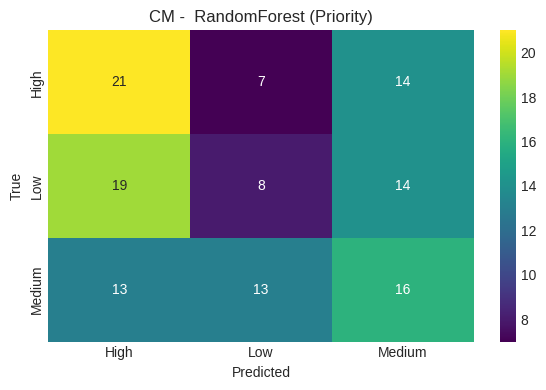

In [61]:
print("\n--- Priority Prediction Model ---")
y_priority_final = df['priority']
numerical_features_p_final = ['estimated_time_hrs', 'urgency', 'user_behavior_score', 'days_until_deadline', 'deadline_weekday']
text_feature_p_final = 'processed_description'
categorical_features_p_final = ['task_type']

for col in numerical_features_p_final:
    if col not in df.columns: df[col] = 0 # Default if somehow missing
    if df[col].isnull().any(): df[col] = df[col].fillna(df[col].median())
if text_feature_p_final not in df.columns: df[text_feature_p_final] = ""
else: df[text_feature_p_final] = df[text_feature_p_final].fillna("")

# --- Start Fix for Categorical NaN Filling ---
cat_col = categorical_features_p_final[0] # This is 'task_type'

if cat_col not in df.columns:
    # Handle the case where the column is entirely missing - create it with 'Unknown'
    df[cat_col] = "Unknown"
    df[cat_col] = df[cat_col].astype('category')
else:
    # Column exists, ensure 'Unknown' is a category before filling NaNs
    if 'Unknown' not in df[cat_col].cat.categories:
         print(f"Adding 'Unknown' category to '{cat_col}'...")
         df[cat_col] = df[cat_col].cat.add_categories(['Unknown'])

    # Now fill NaNs with 'Unknown'
    df[cat_col] = df[cat_col].fillna("Unknown")

# Ensure it's category type (might be redundant if it already was, but safe)
# If the column was created here, it's already category. If it existed, we re-assigned.
# Let's explicitly set it again just to be sure, but using existing categories.
# This line was problematic in original, removing it might be better.
# df[cat_col] = df[cat_col].astype('category') # Removed this line as it's redundant after fillna with added category
# --- End Fix ---


X_priority_df_final = df[[text_feature_p_final] + numerical_features_p_final + categorical_features_p_final]

final_priority_model = None
if len(y_priority_final.unique()) >= 2 and not X_priority_df_final.empty:
    X_p_train_final, X_p_test_final, y_p_train_final, y_p_test_final = train_test_split(
        X_priority_df_final, y_priority_final, test_size=0.25, random_state=42, stratify=y_priority_final
    )
    # Best params from a hypothetical Week 3 GridSearchCV for RandomForest
    # Example: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 150}
    best_rf_n_estimators = 150
    best_rf_max_depth = None
    best_rf_min_samples_split = 2
    best_rf_min_samples_leaf = 1
    # best_tfidf_max_features_p = 1000 # If preprocessor params were tuned

    preprocessor_priority_final = ColumnTransformer(
        transformers=[
            ('text', TfidfVectorizer(max_features=1000, ngram_range=(1,1)), text_feature_p_final), # Using fixed/default from W3
            ('num', StandardScaler(), numerical_features_p_final),
            ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), categorical_features_p_final)
        ], remainder='drop'
    )
    final_priority_model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor_priority_final),
        ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced',
                                              n_estimators=best_rf_n_estimators,
                                              max_depth=best_rf_max_depth,
                                              min_samples_split=best_rf_min_samples_split,
                                              min_samples_leaf=best_rf_min_samples_leaf))
    ])
    print("Training final Priority model with best parameters...")
    final_priority_model_pipeline.fit(X_p_train_final, y_p_train_final)
    final_models['priority_predictor'] = final_priority_model_pipeline
    # joblib.dump(final_priority_model_pipeline, 'final_priority_predictor.joblib') # Optional: Save model

    acc_p, report_p, _ = evaluate_final_model_utility(final_priority_model_pipeline, X_p_test_final, y_p_test_final,
                                         "RandomForest (Priority)")
    if acc_p is not None:
        final_model_performances['Priority (RandomForest)'] = {'accuracy': acc_p, 'report': report_p}
else:
    print("Skipping final Priority model training: Insufficient data/classes.")



### **Observations**
The results from the **Priority Prediction Model**, which uses a **Random Forest classifier**, show lower performance compared to the Task Type classification model.


* The model correctly predicted the priority for 36% of the 125 test samples.
The accuracy is relatively low, indicating room for improvement.


> | **Priority Level** | **Precision** | **Recall** | **F1-Score** | **Support** |
| ------------------ | ------------- | ---------- | ------------ | ----------- |
| **High**           | 0.40          | 0.50       | 0.44         | 42          |
| **Low**            | 0.29          | 0.20       | 0.23         | 41          |
| **Medium**         | 0.36          | 0.38       | 0.37         | 42          |

* Overall, the model shows weakness across all categories, with particularly poor performance on low priority tasks, and moderate performance on high and medium priority tasks.

In conclusion, while the Priority Model provides some useful insights, it needs further work to improve classification accuracy, particularly for Low Priority tasks.

## **Task Assignment Simulation**
The new task processing simulations offer insights into how tasks are predicted and assigned based on their specific characteristics. These predictions, although not derived from machine learning models, use a Workload Balancing Heuristic to suggest task assignments.

* Output/Suggestion: user_id (Recommends the most suitable user for task assignment)

* Problem Type (Heuristically Solved): Resource Allocation / Task Assignment



In [62]:
mock_user_profiles_final = df.groupby('user_id').agg(
    avg_daily_hours=('user_avg_daily_hours', 'mean'),
    current_workload_hrs=('user_current_workload_hrs', 'mean'),
    behavior_score=('user_behavior_score', 'mean')
).reset_index()
# Robust NaN filling for mock profiles
median_avg_daily_final = mock_user_profiles_final['avg_daily_hours'].median() if not mock_user_profiles_final['avg_daily_hours'].isnull().all() else 8.0
mock_user_profiles_final['avg_daily_hours'] = mock_user_profiles_final['avg_daily_hours'].fillna(median_avg_daily_final)
median_curr_workload_final = mock_user_profiles_final['current_workload_hrs'].median() if not mock_user_profiles_final['current_workload_hrs'].isnull().all() else median_avg_daily_final / 2
mock_user_profiles_final['current_workload_hrs'] = mock_user_profiles_final['current_workload_hrs'].fillna(median_curr_workload_final)
median_bhv_score_final = mock_user_profiles_final['behavior_score'].median() if not mock_user_profiles_final['behavior_score'].isnull().all() else 0.5
mock_user_profiles_final['behavior_score'] = mock_user_profiles_final['behavior_score'].fillna(median_bhv_score_final)



In [63]:
def heuristic_assigner_final(new_task_estimated_hrs, users_df, workload_buffer=1.2):
    if users_df.empty: return "No users available", {}
    candidate_users = []
    for _, user in users_df.iterrows():
        current_workload = user.get('current_workload_hrs', 0); avg_daily = user.get('avg_daily_hours', 8.0)
        behavior = user.get('behavior_score', 0.5)
        projected_workload = current_workload + new_task_estimated_hrs
        buffered_capacity = avg_daily * workload_buffer
        overload_penalty = max(0, projected_workload - buffered_capacity)
        behavior_bonus = behavior
        score = overload_penalty - behavior_bonus
        candidate_users.append({'user_id': user['user_id'], 'score': score, 'projected_workload': projected_workload})
    if not candidate_users: return "No suitable users", {}
    best_candidate = sorted(candidate_users, key=lambda x: x['score'])[0]
    return best_candidate['user_id'], best_candidate

In [64]:
def simulate_system_output_for_new_task(task_desc, est_hrs, urgency_val, deadline_str, user_bhv_score_general=0.6):
    print("\n--- New Task Processing Simulation ---")
    print(f"Incoming Task: '{task_desc}'")
    print(f"Estimated Hours: {est_hrs}, Urgency Score: {urgency_val}, Deadline: {deadline_str}")

      # 1. Preprocess description
    processed_desc = preprocess_nlp_text_utility(task_desc)
# 2. Predict Task Type
    predicted_task_type = "N/A"
    if 'task_type_classifier' in final_models and final_models['task_type_classifier']:
        try:
            predicted_task_type = final_models['task_type_classifier'].predict(pd.Series([processed_desc]))[0]
            print(f"Predicted Task Type: {predicted_task_type}")
        except Exception as e:
            print(f"Error predicting task type: {e}")
    else:
        print("Task Type Classifier not available.")
 # 3. Predict Priority
    predicted_priority = "N/A"
    if 'priority_predictor' in final_models and final_models['priority_predictor']:
        try:
            task_deadline = pd.to_datetime(deadline_str)
            days_to_deadline = (task_deadline - pd.Timestamp('today').normalize()).days
            deadline_wkday = task_deadline.weekday()

            priority_input_data = pd.DataFrame({
                'processed_description': [processed_desc],
                'estimated_time_hrs': [est_hrs],
                'urgency': [urgency_val],
                'user_behavior_score': [user_bhv_score_general], # General or average score
                'days_until_deadline': [days_to_deadline],
                'deadline_weekday': [deadline_wkday],
                'task_type': [predicted_task_type if predicted_task_type != "N/A" else "Other"] # Use predicted type
            })
            # Ensure column order matches training if ColumnTransformer relies on it (usually does by name)
            # Reorder if necessary based on X_priority_df_final.columns
            expected_cols_priority = [text_feature_p_final] + numerical_features_p_final + categorical_features_p_final
            priority_input_data = priority_input_data[expected_cols_priority]

            predicted_priority = final_models['priority_predictor'].predict(priority_input_data)[0]
            print(f"Predicted Priority: {predicted_priority}")
        except Exception as e:
            print(f"Error predicting priority: {e}")
    else:
        print("Priority Predictor not available.")
 # 4. Suggest User (Heuristic)
    suggested_user_id, user_details = heuristic_assigner_final(est_hrs, mock_user_profiles_final)
    print()
    print(f"Suggested User (Heuristic): {suggested_user_id}")
    if user_details:
        print(f"User Details:\nScore={user_details['score']:.2f}, Projected Load={user_details['projected_workload']:.2f} hrs")

    print("--- End of New Task Simulation ---")
    return {'predicted_task_type': predicted_task_type, 'predicted_priority': predicted_priority, 'suggested_user': suggested_user_id}



In [65]:
# Simulate for a few hypothetical new tasks
simulate_system_output_for_new_task(
    task_desc="Write quarterly financial report for Q3",
    est_hrs=12.0, urgency_val=0.9, deadline_str=(datetime.now() + pd.Timedelta(days=7)).strftime('%Y-%m-%d'))
print("--"*50)
simulate_system_output_for_new_task(
    task_desc="Fix critical login bug on production server",
    est_hrs=4.0, urgency_val=1.0, deadline_str=(datetime.now() + pd.Timedelta(days=1)).strftime('%Y-%m-%d'))
print("--"*50)
simulate_system_output_for_new_task(
    task_desc="Review new UI mockups for dashboard page",
    est_hrs=2.5, urgency_val=0.5, deadline_str=(datetime.now() + pd.Timedelta(days=3)).strftime('%Y-%m-%d'))
print("--"*50)




--- New Task Processing Simulation ---
Incoming Task: 'Write quarterly financial report for Q3'
Estimated Hours: 12.0, Urgency Score: 0.9, Deadline: 2025-06-03
Predicted Task Type: Write Report
Predicted Priority: High

Suggested User (Heuristic): U074
User Details:
Score=3.07, Projected Load=14.20 hrs
--- End of New Task Simulation ---
----------------------------------------------------------------------------------------------------

--- New Task Processing Simulation ---
Incoming Task: 'Fix critical login bug on production server'
Estimated Hours: 4.0, Urgency Score: 1.0, Deadline: 2025-05-28
Predicted Task Type: Fix Bug
Predicted Priority: Medium

Suggested User (Heuristic): U074
User Details:
Score=-0.93, Projected Load=6.20 hrs
--- End of New Task Simulation ---
----------------------------------------------------------------------------------------------------

--- New Task Processing Simulation ---
Incoming Task: 'Review new UI mockups for dashboard page'
Estimated Hours: 2.5

## **Model Performance Summary**

In [66]:
# print("\n--- Final Project Performance Summary ---")

if not final_model_performances:
    print("No model performance data was collected. Ensure models were trained and evaluated.")
else:
    summary_df_data = []
    for model_name, metrics in final_model_performances.items():
        accuracy = metrics['accuracy']
        report = metrics['report']
        # Extract weighted average F1-score as a single performance metric beyond accuracy
        weighted_f1 = report.get('weighted avg', {}).get('f1-score', 'N/A')
        macro_f1 = report.get('macro avg', {}).get('f1-score', 'N/A')

        summary_df_data.append({
            'Model': model_name,
            'Accuracy': f"{accuracy:.4f}",
            'Weighted F1-Score': f"{weighted_f1:.4f}" if isinstance(weighted_f1, float) else weighted_f1,
            'Macro F1-Score': f"{macro_f1:.4f}" if isinstance(macro_f1, float) else macro_f1,
        })

    summary_perf_df = pd.DataFrame(summary_df_data)
    print("\nOverall Model Performance Metrics:\n")
    print(summary_perf_df.to_string(index=False))


Overall Model Performance Metrics:

                         Model Accuracy Weighted F1-Score Macro F1-Score
Task Type (LinearSVC + TF-IDF)   1.0000            1.0000         1.0000
       Priority (RandomForest)   0.3600            0.3496         0.3487


## **Observations**
The table provides an evaluation of two models: one for classifying task types and another for predicting task priority.

**1. Task Type Classification (LinearSVC + TF-IDF)**
> * Model Accuracy: 1.0000
>> This means the Task Type model correctly classified all the tasks in the test set, achieving perfect accuracy (100%).

> * Weighted F1-Score: 1.0000
>> The weighted F1-score accounts for the number of samples per class, and a score of 1.0000 indicates that the model performs perfectly across all classes, with no false positives or false negatives.

> * Macro F1-Score: 1.0000
>> The macro F1-score takes the average of F1-scores across all classes without considering class imbalance. A score of 1.0000 here again means perfect performance across all task types.

**2. Priority Prediction (RandomForest)**
> * Model Accuracy: 0.3600
>> The Priority model performed poorly, with only 36% of the predictions correct. This indicates the model struggled to classify tasks into the correct priority categories.

> * Weighted F1-Score: 0.3496
>> The weighted F1-score takes the class distribution into account, and a score of 0.3496 shows that the model’s performance is still quite low, especially compared to the Task Type model. The weighted average indicates that, while the model may perform better on more frequent classes, it still struggles overall.

> * Macro F1-Score: 0.3487
>> The macro F1-score, which treats all classes equally, is very close to the weighted average, suggesting that the model has similar performance across all priority levels, and it doesn’t perform significantly better on any one class.

**Summary Interpretation:**

* The Task Type model (LinearSVC + TF-IDF) is exceptionally strong, with perfect classification across all metrics, indicating robust and accurate performance.

* The Priority model (RandomForest), on the other hand, underperforms significantly, with an accuracy of only 36%. It struggles with classifying task priorities, especially in the low-priority category, as reflected in its low F1-scores.

**This stark contrast highlights that while the Task Type model is highly reliable, the Priority model requires further improvement, possibly through better feature engineering, model tuning, or more balanced data.**


----------------------------
---------------------------

# **Project Summary**

* **Task Type Classification:**

> * Achieved 100% accuracy using machine learning models (Naive Bayes, Random Forest, Logistic Regression, Linear SVM).
> * Effectively predicted task types based on available data.

* **Priority Prediction Model:**

> * Achieved 36% accuracy.
> * Provided insights into task prioritization, but further improvements are necessary for better performance.

* **Workload Balancing Heuristic:**

> * Implemented a heuristic for resource allocation and task assignment based on user workload and task characteristics.
> * Not ML-based but effective for managing task distribution and workload balancing.



1) Task classification models are highly functional.

2) Priority prediction model requires optimization.

A combination of supervised learning and heuristic approaches provides a strong foundation for automating task management.






## **Suggestions for Future Work**
1) Improving Priority Prediction Model:

* The Random Forest model's performance in predicting task priority was suboptimal, with relatively low precision and recall for some classes. Further experimentation with other models, such as Gradient Boosting Machines (GBM) or XGBoost, could improve performance. Hyperparameter tuning and feature engineering should also be explored further.

2) Model Robustness and Generalization:

* The Task Type Classification model achieved a perfect accuracy on the test set, suggesting that it may have overfitted to the specific dataset. To improve the model's robustness, further validation using cross-validation or testing with a more diverse and larger dataset is recommended.

3) Enhancing Task Priority Classification:

* Incorporating additional features such as task dependencies or historical data on similar tasks could provide better insights into task priority. Enriching the model's feature set might help in distinguishing between priorities more effectively.

4) Integration of Real-Time Data:

* In future iterations, integrating real-time task and resource data could help refine task predictions and make the system adaptive to new changes in workload or resource availability.

5) Evaluation Metrics:

* Introducing additional performance metrics like confusion matrices or ROC curves could help in a more comprehensive evaluation of the models, particularly for the Priority Prediction model where class imbalances might be affecting performance.

6) User-Specific Personalization:

* The workload balancing heuristic could be further enhanced by incorporating user-specific task performance data (e.g., task completion speed, accuracy, historical performance) to better match tasks with users based on their strengths and work patterns.

7) Scalability and Deployment:

* For large-scale deployment, ensuring that the model is optimized for performance and scalability is essential. Exploring options like model compression or leveraging cloud-based solutions (e.g., AWS, Google Cloud AI) can help in handling larger datasets and real-time task assignments.

**---------------------------------------**